In [1]:
import numpy as np
from pandas import Series
import seaborn as sns
import pandas as pd #the csv reading library
import matplotlib.pyplot as plt #the ploting library
import glob #to get file names
import scipy.optimize
from scipy.optimize import curve_fit
from scipy import interpolate
from scipy.interpolate import pchip_interpolate
import math
from pandas import Series
from lmfit import Model, Parameter, report_fit
import scipy.ndimage
from scipy.ndimage import gaussian_filter1d
from scipy.signal import savgol_filter
from numpy import ones,vstack
from numpy.linalg import lstsq

In [2]:
#make the last 

files = glob.glob('../Dissertation_projects/Data/CNS/FINAL_DATA/*.xlsx')

for f in files: 
    read_file = pd.read_excel (f, sheet_name='Final_data')
    name = f[:-5]
    read_file.to_csv (name + ".csv", index = None, header=True)
    
#make the new files list the csv files much safer
files = glob.glob('../Dissertation_projects/Data/CNS/FINAL_DATA/*.csv')
files

['../Dissertation_projects/Data/CNS/FINAL_DATA\\ST.11_FALL2021.csv',
 '../Dissertation_projects/Data/CNS/FINAL_DATA\\ST.11_SUMMER2022.csv',
 '../Dissertation_projects/Data/CNS/FINAL_DATA\\ST.14_FALL2021.csv',
 '../Dissertation_projects/Data/CNS/FINAL_DATA\\ST.14_SPRING2022.csv',
 '../Dissertation_projects/Data/CNS/FINAL_DATA\\ST.14_SUMMER2022.csv',
 '../Dissertation_projects/Data/CNS/FINAL_DATA\\ST.2_FALL2021.csv',
 '../Dissertation_projects/Data/CNS/FINAL_DATA\\ST.2_SPRING2022.csv',
 '../Dissertation_projects/Data/CNS/FINAL_DATA\\ST.2_SUMMER2022.csv',
 '../Dissertation_projects/Data/CNS/FINAL_DATA\\ST.5B_FALL2021.csv',
 '../Dissertation_projects/Data/CNS/FINAL_DATA\\ST.5B_SPRING2022.csv',
 '../Dissertation_projects/Data/CNS/FINAL_DATA\\ST.5B_SUMMER2022.csv',
 '../Dissertation_projects/Data/CNS/FINAL_DATA\\ST.7_FALL2021.csv',
 '../Dissertation_projects/Data/CNS/FINAL_DATA\\ST.7_SPRING2022.csv',
 '../Dissertation_projects/Data/CNS/FINAL_DATA\\ST.7_SUMMER2022.csv',
 '../Dissertation_proj

In [3]:
#make function 
def GET_DATA(name):
    df = pd.read_csv(name, sep=',', index_col=0)
    df = pd.DataFrame(df)
    return df

frames = []
for f in files:
    df = GET_DATA(f) # runs the processing function  
    frames.append(df) # adds the new col from each scan to a part of frames 
df = pd.concat(frames, axis=0, ignore_index=False)

df['OC/TN'] = (df['OC%']/12) / (df['TN%']/14) 

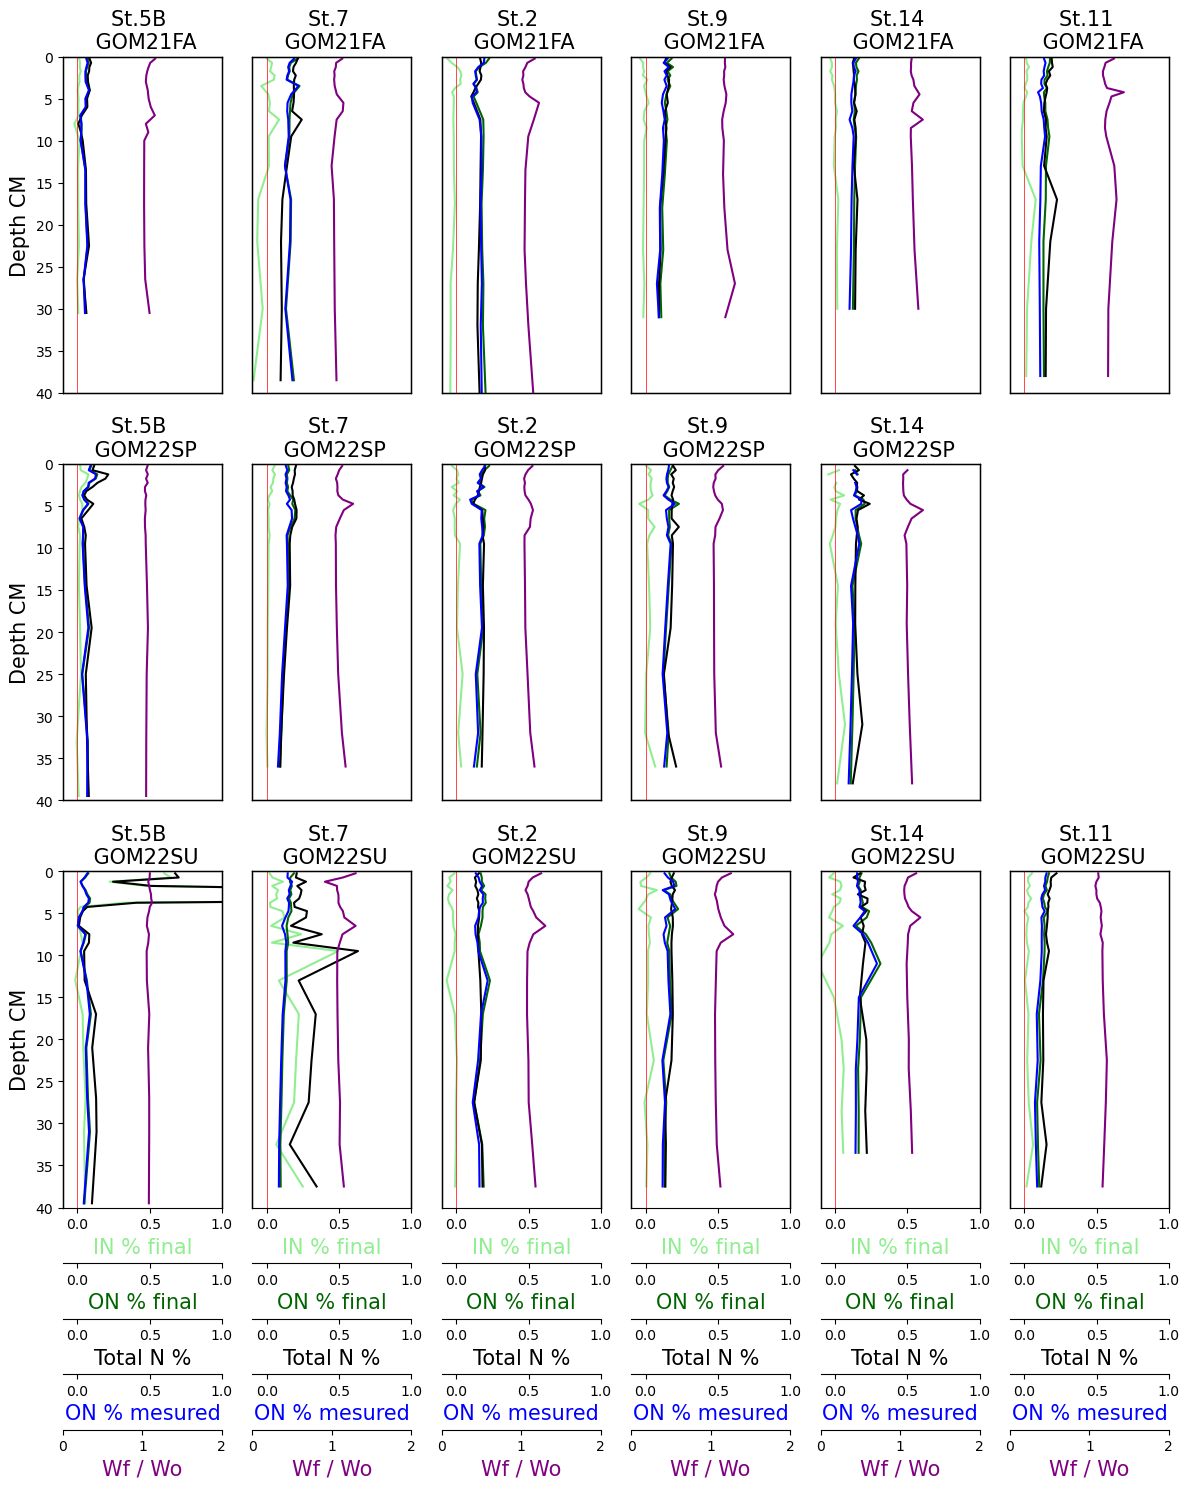

In [4]:
stations = ['St.5B','St.7','St.2','St.9','St.14','St.11']
trips = ['GOM21FA','GOM22SP', 'GOM22SU']

fig, axes = plt.subplots(len(trips), len(stations), figsize=(len(stations)*2, len(trips)*5))

for i, trip in enumerate(trips):
    for j, station in enumerate(stations):
        # Filter by trip and station
        sub_df = df[(df['Trip'] == trip) & (df['Station'] == station)]
        
        if not sub_df.empty:
            
            ax = axes[i, j]
            
            ax.plot(sub_df['IN%'], sub_df['Depth_CM'], c = 'lightgreen')
            ax.set_title(f'{station} \n {trip}', size =15)
            ax.set_ylim(40,0)
            ax.set_xlim(-.1,1)
            ax.axvline(linewidth=.5, color='r')
            
            ax2 = ax.twiny()
            ax2.plot(sub_df['ON%'], sub_df['Depth_CM'], c = 'darkgreen')
            ax2.set_ylim(40,0)
            ax2.set_xlim(-.1,1)
            
            ax3 = ax.twiny()
            ax3.plot(sub_df['TN%'], sub_df['Depth_CM'], c = 'black')
            ax3.set_ylim(40,0)
            ax3.set_xlim(-.1,1)
            
            ax4 = ax.twiny()
            ax4.plot(sub_df['ON%_mesured'], sub_df['Depth_CM'], c = 'blue')
            ax4.set_ylim(40,0)
            ax4.set_xlim(-.1,1)
            
            ax5 = ax.twiny()
            ax5.plot(sub_df['Wf/Wo'], sub_df['Depth_CM'], c = 'purple')
            ax5.set_ylim(40,0)
            ax5.set_xlim(0,2)
        
        else: 
            axes[i, j].axis('off')  
        if j == 0:
            axes[i,j].set_ylabel('Depth CM', size=15, c='black')
            axes[i,j].yaxis.set_tick_params(labelsize=10)
        else: 
            ax.set_ylabel('')
            ax.yaxis.set_ticklabels([])
            ax.set_yticks([])
        
        if i == 2:
            ax.set_xlabel('IN % final', size=15, c='lightgreen')
            ax.xaxis.set_tick_params(labelsize=10)
            
            ax2.set_xlabel('ON % final', size = 15, c= 'darkgreen')
            ax2.xaxis.set_ticks_position('bottom')
            ax2.xaxis.set_label_position('bottom')
            ax2.spines['bottom'].set_position(('outward', 40))
            
            ax3.set_xlabel('Total N %', size = 15, c= 'black')
            ax3.xaxis.set_ticks_position('bottom')
            ax3.xaxis.set_label_position('bottom')
            ax3.spines['bottom'].set_position(('outward', 80))
            
            ax4.set_xlabel('ON % mesured', size = 15, c= 'blue')
            ax4.xaxis.set_ticks_position('bottom')
            ax4.xaxis.set_label_position('bottom')
            ax4.spines['bottom'].set_position(('outward', 120))
            
            ax5.set_xlabel('Wf / Wo', size = 15, c= 'purple')
            ax5.xaxis.set_ticks_position('bottom')
            ax5.xaxis.set_label_position('bottom')
            ax5.spines['bottom'].set_position(('outward', 160))
            
        else: 
            ax.set_xlabel('')
            ax.xaxis.set_ticklabels([])
            ax.set_xticks([])
            
            ax2.set_xlabel('')
            ax2.xaxis.set_ticklabels([])
            ax2.set_xticks([])
            
            ax3.set_xlabel('')
            ax3.xaxis.set_ticklabels([])
            ax3.set_xticks([])
            
            ax4.set_xlabel('')
            ax4.xaxis.set_ticklabels([])
            ax4.set_xticks([])
            
            ax5.set_xlabel('')
            ax5.xaxis.set_ticklabels([])
            ax5.set_xticks([])
        

plt.tight_layout()
fig.set_facecolor('w')
plt.show()

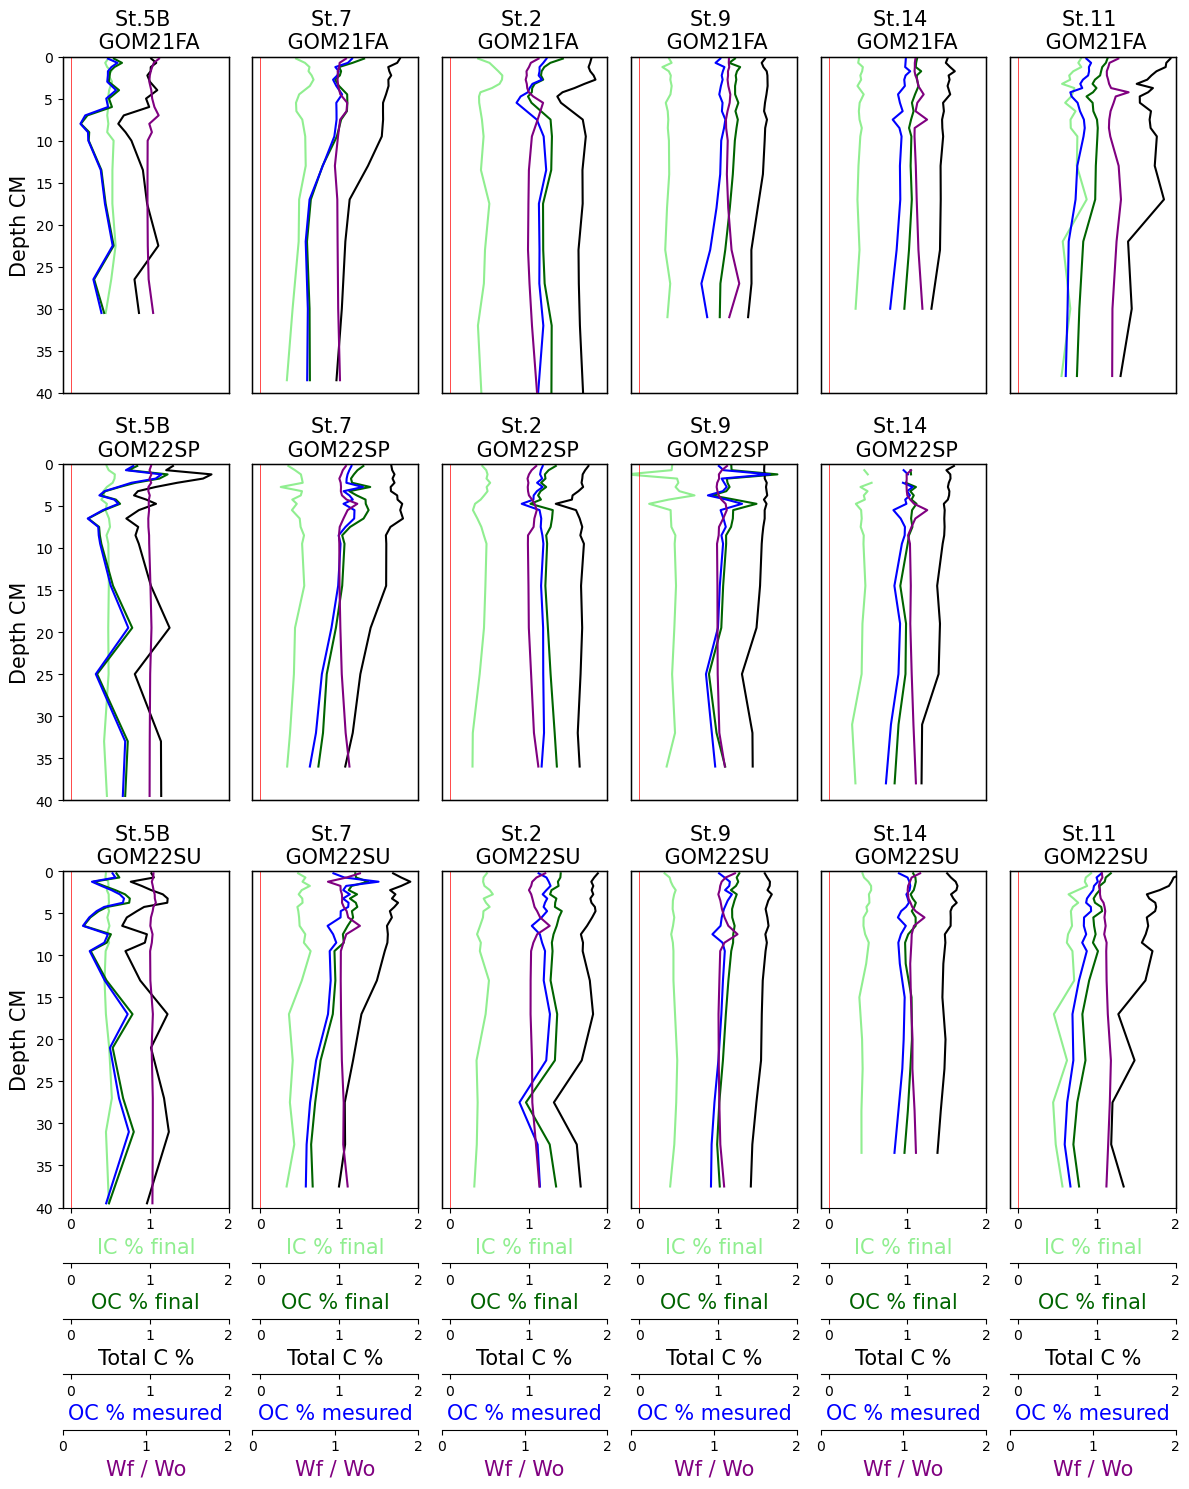

In [5]:

fig, axes = plt.subplots(len(trips), len(stations), figsize=(len(stations)*2, len(trips)*5))

for i, trip in enumerate(trips):
    for j, station in enumerate(stations):
        # Filter by trip and station
        sub_df = df[(df['Trip'] == trip) & (df['Station'] == station)]
        
        if not sub_df.empty:
            
            ax = axes[i, j]
            
            ax.plot(sub_df['IC%'], sub_df['Depth_CM'], c = 'lightgreen')
            ax.set_title(f'{station} \n {trip}', size =15)
            ax.set_ylim(40,0)
            ax.set_xlim(-.1,2)
            ax.axvline(linewidth=.5, color='r')
            
            ax2 = ax.twiny()
            ax2.plot(sub_df['OC%'], sub_df['Depth_CM'], c = 'darkgreen')
            ax2.set_ylim(40,0)
            ax2.set_xlim(-.1,2)
            
            ax3 = ax.twiny()
            ax3.plot(sub_df['TC%'], sub_df['Depth_CM'], c = 'black')
            ax3.set_ylim(40,0)
            ax3.set_xlim(-.1,2)
            
            ax4 = ax.twiny()
            ax4.plot(sub_df['OC%_mesured'], sub_df['Depth_CM'], c = 'blue')
            ax4.set_ylim(40,0)
            ax4.set_xlim(-.1,2)
            
            ax5 = ax.twiny()
            ax5.plot(sub_df['Wf/Wo'], sub_df['Depth_CM'], c = 'purple')
            ax5.set_ylim(40,0)
            ax5.set_xlim(0,2)
        
        else: 
            axes[i, j].axis('off')  
        if j == 0:
            axes[i,j].set_ylabel('Depth CM', size=15, c='black')
            axes[i,j].yaxis.set_tick_params(labelsize=10)
        else: 
            ax.set_ylabel('')
            ax.yaxis.set_ticklabels([])
            ax.set_yticks([])
        
        if i == 2:
            ax.set_xlabel('IC % final', size=15, c='lightgreen')
            ax.xaxis.set_tick_params(labelsize=10)
            
            ax2.set_xlabel('OC % final', size = 15, c= 'darkgreen')
            ax2.xaxis.set_ticks_position('bottom')
            ax2.xaxis.set_label_position('bottom')
            ax2.spines['bottom'].set_position(('outward', 40))
            
            ax3.set_xlabel('Total C %', size = 15, c= 'black')
            ax3.xaxis.set_ticks_position('bottom')
            ax3.xaxis.set_label_position('bottom')
            ax3.spines['bottom'].set_position(('outward', 80))
            
            ax4.set_xlabel('OC % mesured', size = 15, c= 'blue')
            ax4.xaxis.set_ticks_position('bottom')
            ax4.xaxis.set_label_position('bottom')
            ax4.spines['bottom'].set_position(('outward', 120))
            
            ax5.set_xlabel('Wf / Wo', size = 15, c= 'purple')
            ax5.xaxis.set_ticks_position('bottom')
            ax5.xaxis.set_label_position('bottom')
            ax5.spines['bottom'].set_position(('outward', 160))
        else: 
            ax.set_xlabel('')
            ax.xaxis.set_ticklabels([])
            ax.set_xticks([])
            
            ax2.set_xlabel('')
            ax2.xaxis.set_ticklabels([])
            ax2.set_xticks([])
            
            ax3.set_xlabel('')
            ax3.xaxis.set_ticklabels([])
            ax3.set_xticks([])
            
            ax4.set_xlabel('')
            ax4.xaxis.set_ticklabels([])
            ax4.set_xticks([])
            
            ax5.set_xlabel('')
            ax5.xaxis.set_ticklabels([])
            ax5.set_xticks([])
        

plt.tight_layout()
fig.set_facecolor('w')
plt.show()

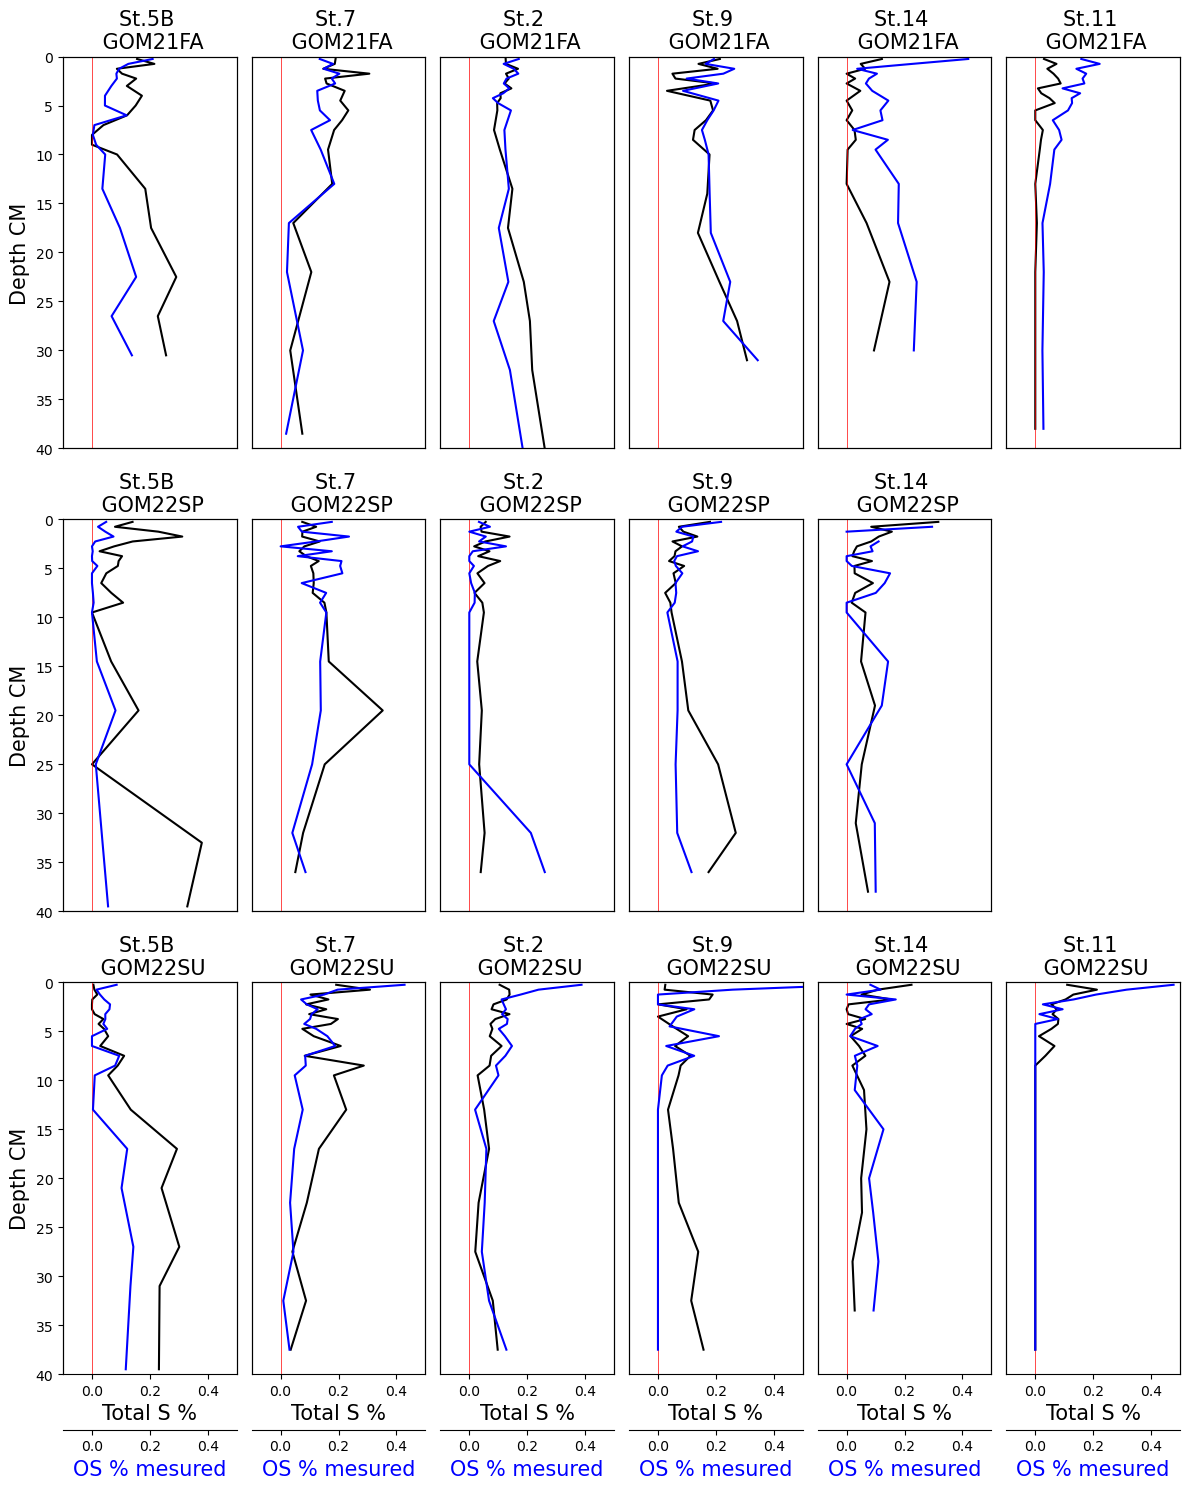

In [6]:

fig, axes = plt.subplots(len(trips), len(stations), figsize=(len(stations)*2, len(trips)*5))

for i, trip in enumerate(trips):
    for j, station in enumerate(stations):
        # Filter by trip and station
        sub_df = df[(df['Trip'] == trip) & (df['Station'] == station)]
        
        if not sub_df.empty:
            
            ax = axes[i, j]
            
            ax.plot(sub_df['TS%'], sub_df['Depth_CM'], c = 'black')
            ax.set_title(f'{station} \n {trip}', size =15)
            ax.set_ylim(40,0)
            ax.set_xlim(-.1,.5)
            ax.axvline(linewidth=.5, color='r')

            
            ax4 = ax.twiny()
            ax4.plot(sub_df['OS%_mesured'], sub_df['Depth_CM'], c = 'blue')
            ax4.set_ylim(40,0)
            ax4.set_xlim(-.1,.5)
        
        else: 
            axes[i, j].axis('off')  
        if j == 0:
            axes[i,j].set_ylabel('Depth CM', size=15, c='black')
            axes[i,j].yaxis.set_tick_params(labelsize=10)
        else: 
            ax.set_ylabel('')
            ax.yaxis.set_ticklabels([])
            ax.set_yticks([])
        
        if i == 2:
            ax.set_xlabel('Total S %', size=15, c='black')
            ax.xaxis.set_tick_params(labelsize=10)
            
            ax4.set_xlabel('OS % mesured', size = 15, c= 'blue')
            ax4.xaxis.set_ticks_position('bottom')
            ax4.xaxis.set_label_position('bottom')
            ax4.spines['bottom'].set_position(('outward', 40))
            
        else: 
            ax.set_xlabel('')
            ax.xaxis.set_ticklabels([])
            ax.set_xticks([])
            
            
            ax4.set_xlabel('')
            ax4.xaxis.set_ticklabels([])
            ax4.set_xticks([])
            

plt.tight_layout()
fig.set_facecolor('w')
plt.show()

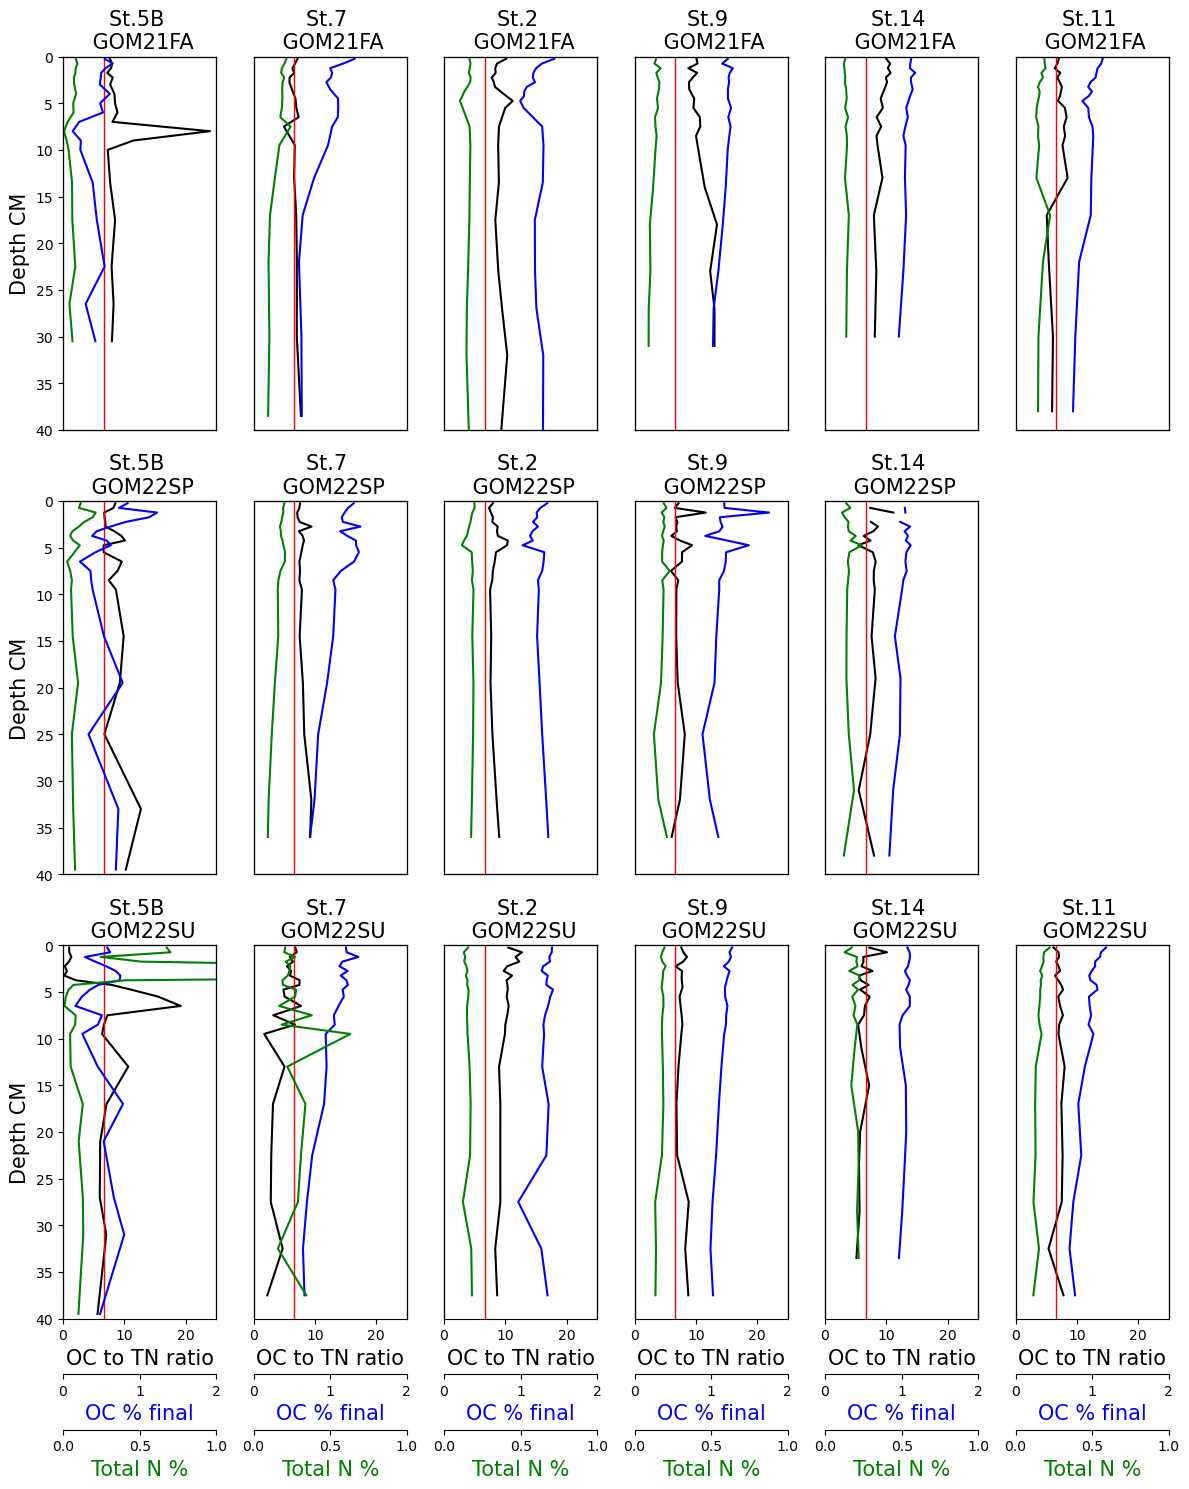

In [7]:

fig, axes = plt.subplots(len(trips), len(stations), figsize=(len(stations)*2, len(trips)*5))

for i, trip in enumerate(trips):
    for j, station in enumerate(stations):
        # Filter by trip and station
        sub_df = df[(df['Trip'] == trip) & (df['Station'] == station)]
        
        if not sub_df.empty:            
            ax = axes[i, j]
            
            ax.plot(sub_df['OC/TN'], sub_df['Depth_CM'], c = 'black')
            ax.set_title(f'{station} \n {trip}', size =15)
            ax.set_ylim(40,0)
            ax.set_xlim(0,25)
            ax.axvline(x=6.6, linewidth=1, color='r')
            #ax.axvline(x=14, linewidth=.5, color='r')
                        
            ax2 = ax.twiny()
            ax2.plot(sub_df['OC%'], sub_df['Depth_CM'], c = 'blue')
            ax2.set_ylim(40,0)
            ax2.set_xlim(0,2)
            
            ax3 = ax.twiny()
            ax3.plot(sub_df['TN%'], sub_df['Depth_CM'], c = 'green')
            ax3.set_ylim(40,0)
            ax3.set_xlim(0,1)
        
        else: 
            axes[i, j].axis('off')  
        if j == 0:
            axes[i,j].set_ylabel('Depth CM', size=15, c='black')
            axes[i,j].yaxis.set_tick_params(labelsize=10)
        else: 
            ax.set_ylabel('')
            ax.yaxis.set_ticklabels([])
            ax.set_yticks([])
        
        if i == 2:
            ax.set_xlabel('OC to TN ratio', size=15, c='black')
            ax.xaxis.set_tick_params(labelsize=10)
            
            ax2.set_xlabel('OC % final', size = 15, c= 'blue')
            ax2.xaxis.set_ticks_position('bottom')
            ax2.xaxis.set_label_position('bottom')
            ax2.spines['bottom'].set_position(('outward', 40))
            
            ax3.set_xlabel('Total N %', size = 15, c= 'green')
            ax3.xaxis.set_ticks_position('bottom')
            ax3.xaxis.set_label_position('bottom')
            ax3.spines['bottom'].set_position(('outward', 80))

        else: 
            ax.set_xlabel('')
            ax.xaxis.set_ticklabels([])
            ax.set_xticks([])
            
            ax2.set_xlabel('')
            ax2.xaxis.set_ticklabels([])
            ax2.set_xticks([])
            
            ax3.set_xlabel('')
            ax3.xaxis.set_ticklabels([])
            ax3.set_xticks([])
        

plt.tight_layout()
fig.set_facecolor('w')
plt.show()

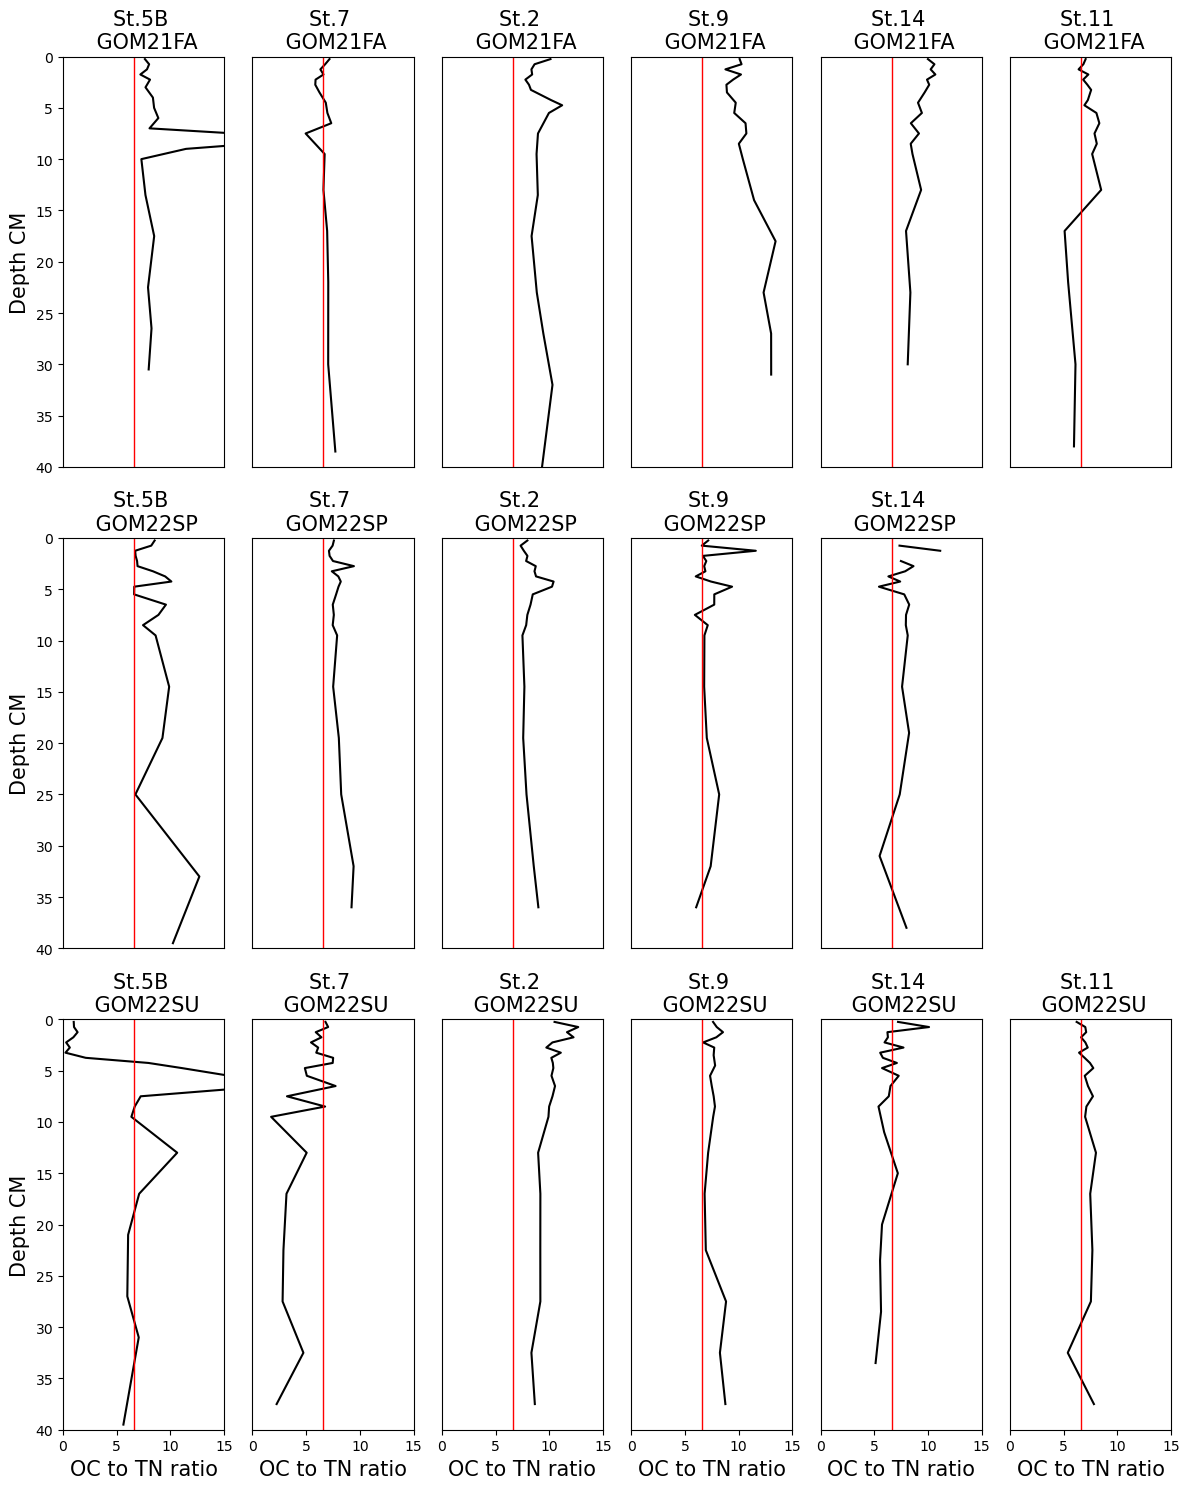

In [8]:

fig, axes = plt.subplots(len(trips), len(stations), figsize=(len(stations)*2, len(trips)*5))

for i, trip in enumerate(trips):
    for j, station in enumerate(stations):
        # Filter by trip and station
        sub_df = df[(df['Trip'] == trip) & (df['Station'] == station)]
        
        if not sub_df.empty:            
            ax = axes[i, j]
            
            ax.plot(sub_df['OC/TN'], sub_df['Depth_CM'], c = 'black')
            ax.set_title(f'{station} \n {trip}', size =15)
            ax.set_ylim(40,0)
            ax.set_xlim(0,15)
            ax.axvline(x=6.6, linewidth=1, color='r')
            #ax.axvline(x=14, linewidth=.5, color='r')
                        
        
        else: 
            axes[i, j].axis('off')  
        if j == 0:
            axes[i,j].set_ylabel('Depth CM', size=15, c='black')
            axes[i,j].yaxis.set_tick_params(labelsize=10)
        else: 
            ax.set_ylabel('')
            ax.yaxis.set_ticklabels([])
            ax.set_yticks([])
        
        if i == 2:
            ax.set_xlabel('OC to TN ratio', size=15, c='black')
            ax.xaxis.set_tick_params(labelsize=10)
            

        else: 
            ax.set_xlabel('')
            ax.xaxis.set_ticklabels([])
            ax.set_xticks([])
            
        

plt.tight_layout()
fig.set_facecolor('w')
plt.show()

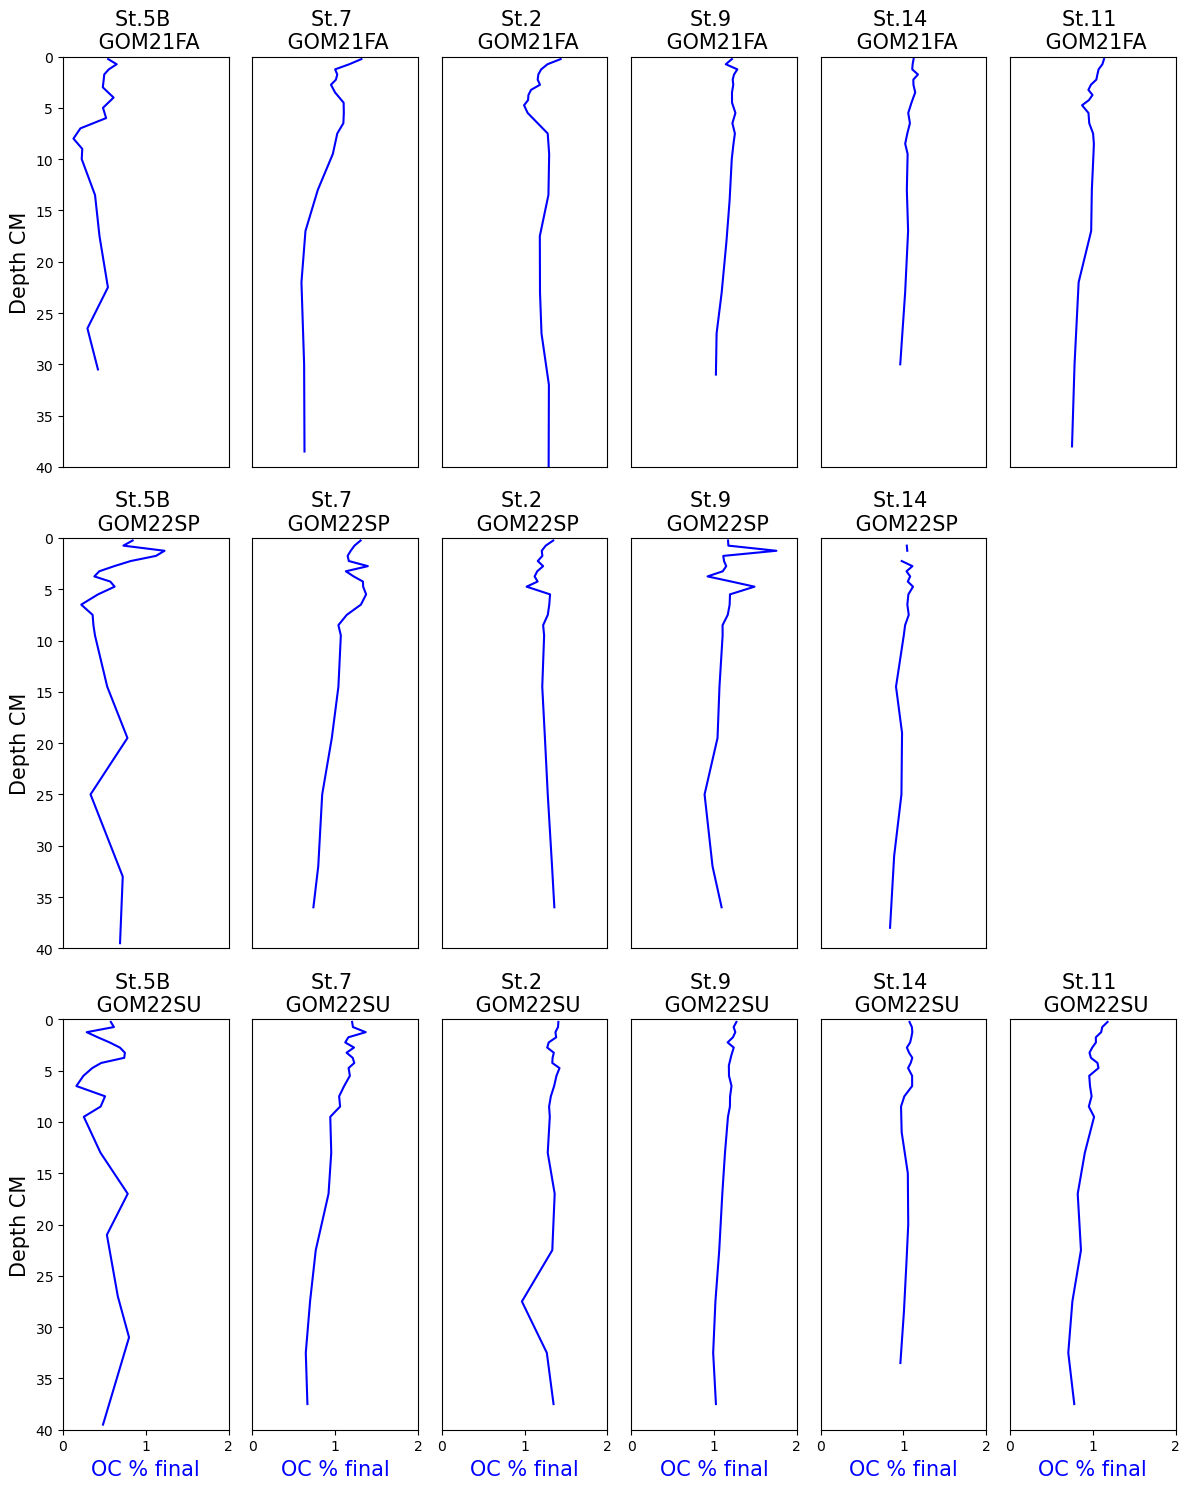

In [9]:

fig, axes = plt.subplots(len(trips), len(stations), figsize=(len(stations)*2, len(trips)*5))

for i, trip in enumerate(trips):
    for j, station in enumerate(stations):
        # Filter by trip and station
        sub_df = df[(df['Trip'] == trip) & (df['Station'] == station)]
        
        if not sub_df.empty:            
            ax = axes[i, j]
            
            ax.plot(sub_df['OC%'], sub_df['Depth_CM'], c = 'blue')
            ax.set_title(f'{station} \n {trip}', size =15)
            ax.set_ylim(40,0)
            ax.set_xlim(0,2)
            ax.axvline(x=6.6, linewidth=1, color='r')
            #ax.axvline(x=14, linewidth=.5, color='r')
        
        else: 
            axes[i, j].axis('off')  
        if j == 0:
            axes[i,j].set_ylabel('Depth CM', size=15, c='black')
            axes[i,j].yaxis.set_tick_params(labelsize=10)
        else: 
            ax.set_ylabel('')
            ax.yaxis.set_ticklabels([])
            ax.set_yticks([])
        
        if i == 2:
            ax.set_xlabel('OC % final', size = 15, c= 'blue')
            ax.xaxis.set_tick_params(labelsize=10)
            

        else: 
            ax.set_xlabel('')
            ax.xaxis.set_ticklabels([])
            ax.set_xticks([])
            
            ax2.set_xlabel('')
            ax2.xaxis.set_ticklabels([])
            ax2.set_xticks([])
            
            ax3.set_xlabel('')
            ax3.xaxis.set_ticklabels([])
            ax3.set_xticks([])
        

plt.tight_layout()
fig.set_facecolor('w')
plt.show()

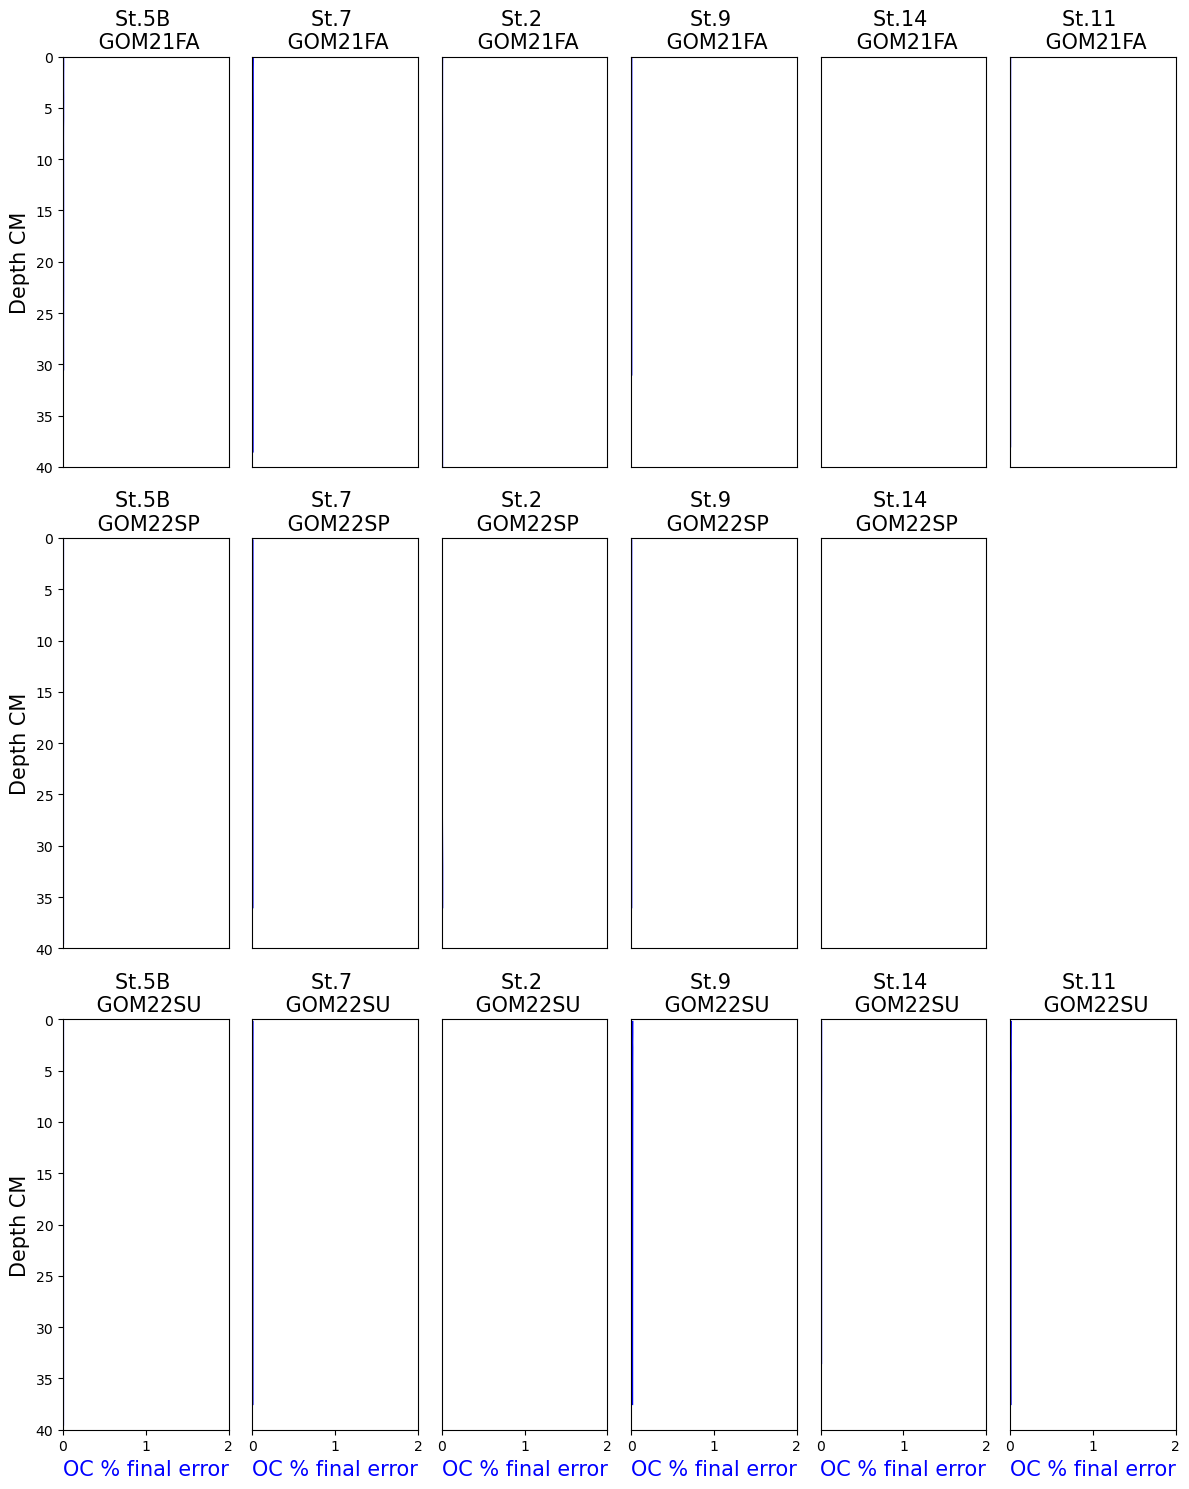

In [10]:

fig, axes = plt.subplots(len(trips), len(stations), figsize=(len(stations)*2, len(trips)*5))

for i, trip in enumerate(trips):
    for j, station in enumerate(stations):
        # Filter by trip and station
        sub_df = df[(df['Trip'] == trip) & (df['Station'] == station)]
        
        if not sub_df.empty:            
            ax = axes[i, j]
            
            ax.plot(sub_df['OC%_error'], sub_df['Depth_CM'], c = 'blue')
            ax.set_title(f'{station} \n {trip}', size =15)
            ax.set_ylim(40,0)
            ax.set_xlim(0,2)
            ax.axvline(x=6.6, linewidth=1, color='r')
            #ax.axvline(x=14, linewidth=.5, color='r')
        
        else: 
            axes[i, j].axis('off')  
        if j == 0:
            axes[i,j].set_ylabel('Depth CM', size=15, c='black')
            axes[i,j].yaxis.set_tick_params(labelsize=10)
        else: 
            ax.set_ylabel('')
            ax.yaxis.set_ticklabels([])
            ax.set_yticks([])
        
        if i == 2:
            ax.set_xlabel('OC % final error', size = 15, c= 'blue')
            ax.xaxis.set_tick_params(labelsize=10)
            

        else: 
            ax.set_xlabel('')
            ax.xaxis.set_ticklabels([])
            ax.set_xticks([])
            
            ax2.set_xlabel('')
            ax2.xaxis.set_ticklabels([])
            ax2.set_xticks([])
            
            ax3.set_xlabel('')
            ax3.xaxis.set_ticklabels([])
            ax3.set_xticks([])
        

plt.tight_layout()
fig.set_facecolor('w')
plt.show()

In [11]:
df['C_g/cm3'] = df['TC%'] * (1-df['Porosity']) * 2.65
df['N_g/cm3'] = df['TN%'] * (1-df['Porosity']) * 2.65
df['S_g/cm3'] = df['TS%'] * (1-df['Porosity']) * 2.65

df['IC_g/cm3'] = df['IC%'] * (1-df['Porosity']) * 2.65
df['OC_g/cm3'] = df['OC%'] * (1-df['Porosity']) * 2.65

df['C_g'] = df['TC%'] * (1-df['Porosity']) * 2.65 * df['Width']
df['N_g'] = df['TN%'] * (1-df['Porosity']) * 2.65 * df['Width']
df['S_g'] = df['TS%'] * (1-df['Porosity']) * 2.65 * df['Width']

df['OC_g'] = df['OC%'] * (1-df['Porosity']) * 2.65 * df['Width']
df['IC_g'] = df['IC%'] * (1-df['Porosity']) * 2.65 * df['Width']



Frames = []

for i, trip in enumerate(trips):
    for j, station in enumerate(stations):
        # Filter by trip and station
        sub = df[(df['Trip'] == trip) & (df['Station'] == station)]
        
        if not sub.empty:
            
            C_5 = sub.loc[(sub['Depth_CM'] < 5) & (sub['Depth_CM'] > 0), 'C_g'].ravel().sum()*10000
            C_15 = sub.loc[(sub['Depth_CM'] < 15) & (sub['Depth_CM'] > 0), 'C_g'].ravel().sum()*10000
            C_30 = sub.loc[(sub['Depth_CM'] < 30) & (sub['Depth_CM'] > 0), 'C_g'].ravel().sum()*10000
            
            OC_2 = sub.loc[(sub['Depth_CM'] < 2) & (sub['Depth_CM'] > 0) & (sub['OC_g'] > 0), 'OC_g'].ravel().sum()*10000
            OC_5 = sub.loc[(sub['Depth_CM'] < 5) & (sub['Depth_CM'] > 0) & (sub['OC_g'] > 0), 'OC_g'].ravel().sum()*10000
            OC_15 = sub.loc[(sub['Depth_CM'] < 15) & (sub['Depth_CM'] > 0) & (sub['OC_g'] > 0), 'OC_g'].ravel().sum()*10000
            OC_30 = sub.loc[(sub['Depth_CM'] < 30) & (sub['Depth_CM'] > 0) & (sub['OC_g'] > 0), 'OC_g'].ravel().sum()*10000
            
            IC_5 = sub.loc[(sub['Depth_CM'] < 5) & (sub['Depth_CM'] > 0) & (sub['IC_g'] > 0), 'IC_g'].ravel().sum()*10000
            IC_15 = sub.loc[(sub['Depth_CM'] < 15) & (sub['Depth_CM'] > 0 & (sub['IC_g'] > 0)), 'IC_g'].ravel().sum()*10000
            IC_30 = sub.loc[(sub['Depth_CM'] < 30) & (sub['Depth_CM'] > 0 & (sub['IC_g'] > 0)), 'IC_g'].ravel().sum()*10000
            
            N_5 = sub.loc[(sub['Depth_CM'] < 5) & (sub['Depth_CM'] > 0), 'N_g'].ravel().sum()*10000
            N_15 = sub.loc[(sub['Depth_CM'] < 15) & (sub['Depth_CM'] > 0), 'N_g'].ravel().sum()*10000
            N_30 = sub.loc[(sub['Depth_CM'] < 30) & (sub['Depth_CM'] > 0), 'N_g'].ravel().sum()*10000
            
            S_5 = sub.loc[(sub['Depth_CM'] < 5) & (sub['Depth_CM'] > 0), 'S_g'].ravel().sum()*10000
            S_15 = sub.loc[(sub['Depth_CM'] < 15) & (sub['Depth_CM'] > 0), 'S_g'].ravel().sum()*10000
            S_30 = sub.loc[(sub['Depth_CM'] < 30) & (sub['Depth_CM'] > 0), 'S_g'].ravel().sum()*10000
            
            code = station + '_' + trip
            
            dic = {'code':[code],
                   'Camp':[trip],
                   'Stn':[station],
                   'Cg_5cm_deep/M2':[C_5], 
                   'Cg_15cm_deep/M2':[C_15], 
                   'Cg_30cm_deep/M2':[C_30],
                   'OCg_2cm_deep/M2':[OC_2],
                   'OCg_5cm_deep/M2':[OC_5], 
                   'OCg_15cm_deep/M2':[OC_15], 
                   'OCg_30cm_deep/M2':[OC_30],
                   'ICg_5cm_deep/M2':[IC_5], 
                   'ICg_15cm_deep/M2':[IC_15], 
                   'ICg_30cm_deep/M2':[IC_30],
                   'Ng_5cm_deep/M2':[N_5], 
                   'Ng_15cm_deep/M2':[N_15], 
                   'Ng_30cm_deep/M2':[N_30],
                   'Sg_5cm_deep/M2':[S_5], 
                   'Sg_15cm_deep/M2':[S_15], 
                   'Sg_30cm_deep/M2':[S_30],}
            
            stocks = pd.DataFrame(dic)
            stocks = stocks.set_index('code', drop=True)
            Frames.append(stocks)
            
NCS_stocks = pd.concat(Frames, axis=0, ignore_index=False)

NCS_stocks.to_csv('../Dissertation_projects/Data/Stats_data_sets/NCS_stocks.csv')

NCS_stocks

C:\Users\hmlbr\AppData\Local\Temp\ipykernel_28084\1110364847.py:26: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  C_5 = sub.loc[(sub['Depth_CM'] < 5) & (sub['Depth_CM'] > 0), 'C_g'].ravel().sum()*10000
C:\Users\hmlbr\AppData\Local\Temp\ipykernel_28084\1110364847.py:27: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  C_15 = sub.loc[(sub['Depth_CM'] < 15) & (sub['Depth_CM'] > 0), 'C_g'].ravel().sum()*10000
C:\Users\hmlbr\AppData\Local\Temp\ipykernel_28084\1110364847.py:28: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  C_30 = sub.loc[(sub['Depth_CM'] < 30) & (sub['Depth_CM'] > 0), 'C_g'].ravel().sum()*10000
C:\Users\hmlbr\AppData\Loca

,Camp,Stn,Cg_5cm_deep/M2,Cg_15cm_deep/M2,Cg_30cm_deep/M2,OCg_2cm_deep/M2,OCg_5cm_deep/M2,OCg_15cm_deep/M2,OCg_30cm_deep/M2,ICg_5cm_deep/M2,ICg_15cm_deep/M2,ICg_30cm_deep/M2,Ng_5cm_deep/M2,Ng_15cm_deep/M2,Ng_30cm_deep/M2,Sg_5cm_deep/M2,Sg_15cm_deep/M2,Sg_30cm_deep/M2
code,,,,,,,,,,,,,,,,,,
St.5B_GOM21FA,GOM21FA,St.5B,33344.913337,137273.582339,281515.010737,6845.209259,17594.940556,56578.567034,120617.690154,15749.972780,80695.015305,160897.320583,2594.618883,8053.332846,17190.528262,4655.807400,17638.604037,53810.726052
St.7_GOM21FA,GOM21FA,St.7,32179.041367,111879.354772,199273.167908,7877.678483,20731.404213,70993.415210,119543.116470,11447.637154,40885.939563,79730.051438,3742.807337,12880.952249,20950.253927,3917.025547,13815.362461,20330.674151
St.2_GOM21FA,GOM21FA,St.2,38847.628615,124524.055679,248711.507385,10163.353189,26796.911262,91539.150169,181125.741725,12050.717353,32984.905510,67585.765661,3450.323952,11825.049649,23602.265862,2881.067567,8989.504856,22393.150879
St.9_GOM21FA,GOM21FA,St.9,37545.108985,150003.820137,293273.105890,9430.721847,28455.216004,114492.744881,222330.563518,9089.892981,35511.075256,70942.542372,3520.864313,12896.881173,22633.296379,3020.615460,14621.273012,34953.213642
St.14_GOM21FA,GOM21FA,St.14,37459.890399,126353.607548,232275.969948,9531.437238,27453.165034,92099.314416,169482.924314,10006.725364,34254.293132,62793.045634,3249.565709,11676.633198,22715.554244,742.966686,1272.256233,9857.329290
St.11_GOM21FA,GOM21FA,St.11,25520.884300,106173.020086,200808.095831,5324.713407,15054.601601,61707.209263,114826.657624,10466.282699,44465.810823,85981.438207,2487.272177,9179.309410,20983.002623,794.459737,1159.934641,1300.392491
St.5B_GOM22SP,GOM22SP,St.5B,37484.818395,167967.221567,299929.467385,7928.113426,22010.106298,83822.063648,151241.754899,15474.712097,84145.157919,148687.712486,3331.412260,11332.676716,21165.621864,3658.823020,10501.691942,18574.847230
St.7_GOM22SP,GOM22SP,St.7,28052.090511,116658.779339,204925.239251,7040.780042,20548.902857,80173.492401,139660.045465,7503.187654,36485.286938,65265.193786,3069.906542,12183.113941,20687.286483,1582.819045,9805.519583,25799.617302
St.2_GOM22SP,GOM22SP,St.2,33487.324634,119526.526964,208559.290831,7641.741392,24433.724073,88249.333438,155691.068471,9053.600561,31277.193526,52868.222359,3287.688027,12866.782434,23025.866910,1337.871435,3198.086614,5236.641355


In [12]:
df['C_gcm3'] = df['TC%'] * (1-df['Porosity']) * 2.65
df['N_gcm3'] = df['TN%'] * (1-df['Porosity']) * 2.65
df['S_gcm3'] = df['TS%'] * (1-df['Porosity']) * 2.65

df['IC_gcm3'] = df['IC%'] * (1-df['Porosity']) * 2.65
df['OC_gcm3'] = df['OC%'] * (1-df['Porosity']) * 2.65

Frames = []

for i, trip in enumerate(trips):
    for j, station in enumerate(stations):
        # Filter by trip and station
        sub = df[(df['Trip'] == trip) & (df['Station'] == station)]
        
        if not sub.empty:
        # Create a row with NaN values
            new_row = pd.DataFrame([np.nan] * len(sub.columns)).T

        # Set column names for the new row
            new_row.columns = sub.columns
            new_row['depth_m'] = 0 
            new_row['fet_mol_per_m3_vol'] = 0 
            new_row['fe2_mol_per_m3_vol'] = 0 
            new_row['fe3_mol_per_m3_vol'] = 0 

        # Append the new row to the DataFrame
            sub = pd.concat([pd.DataFrame(new_row), sub], ignore_index=True)

            ds_n = sub.dropna(subset=['Depth_CM', 'N_gcm3'])
            ds_c = sub.dropna(subset=['Depth_CM', 'C_gcm3'])
            ds_s = sub.dropna(subset=['Depth_CM', 'S_gcm3'])
            ds_oc = sub.dropna(subset=['Depth_CM', 'IC_gcm3'])
            ds_ic = sub.dropna(subset=['Depth_CM', 'OC_gcm3'])


        # Define the depth range you want to integrate over
            start_depth = 0
            stop_depth = 5

        # Interpolating concentration at depth 5 using linear interpolation
            ds_n5 = np.interp(stop_depth, ds_n['Depth_CM'], ds_n['N_gcm3'])
            ds_c5 = np.interp(stop_depth, ds_c['Depth_CM'], ds_c['C_gcm3'])
            ds_s5 = np.interp(stop_depth, ds_s['Depth_CM'], ds_s['S_gcm3'])
            ds_oc5 = np.interp(stop_depth, ds_oc['Depth_CM'], ds_oc['C_gcm3'])
            ds_ic5 = np.interp(stop_depth, ds_ic['Depth_CM'], ds_ic['C_gcm3'])

        #add he depth 5 data  
            new_row.columns = sub.columns
            new_row['Depth_CM'] = stop_depth
            new_row['N_gcm3'] = ds_n5
            new_row['C_gcm3'] = ds_c5
            new_row['S_gcm3'] = ds_s5
            new_row['OC_gcm3'] = ds_oc5
            new_row['IC_gcm3'] = ds_ic5


        # Selecting data within the specified depth range
            selected_data_n = ds_n[(ds_n['Depth_CM'] >= start_depth) & (ds_n['Depth_CM'] <= stop_depth)]
            selected_data_n = pd.concat([selected_data_n, new_row])
        
            selected_data_c = ds_c[(ds_c['Depth_CM'] >= start_depth) & (ds_c['Depth_CM'] <= stop_depth)]
            selected_data_c = pd.concat([selected_data_c, new_row])
        
            selected_data_s = ds_s[(ds_s['Depth_CM'] >= start_depth) & (ds_s['Depth_CM'] <= stop_depth)]
            selected_data_s = pd.concat([selected_data_s, new_row])

            selected_data_oc = ds_oc[(ds_oc['Depth_CM'] >= start_depth) & (ds_oc['Depth_CM'] <= stop_depth)]
            selected_data_oc = pd.concat([selected_data_oc, new_row])
        
            selected_data_ic = ds_ic[(ds_ic['Depth_CM'] >= start_depth) & (ds_ic['Depth_CM'] <= stop_depth)]
            selected_data_ic = pd.concat([selected_data_ic, new_row])


        # Calculating the integral using the trapezoidal rule
            integral_n = np.trapz(selected_data_n['N_gcm3'], selected_data_n['Depth_CM']) / stop_depth
            integral_c = np.trapz(selected_data_c['C_gcm3'], selected_data_c['Depth_CM']) / stop_depth
            integral_s = np.trapz(selected_data_s['S_gcm3'], selected_data_s['Depth_CM']) / stop_depth
            integral_oc = np.trapz(selected_data_oc['OC_gcm3'], selected_data_oc['Depth_CM']) / stop_depth
            integral_ic = np.trapz(selected_data_ic['IC_gcm3'], selected_data_ic['Depth_CM']) / stop_depth


            code = station + '_' + trip
    
            dic = {'code':[code],
                   'Camp':[trip],
                   'Stn':[station],
                   'Cg_5cm_deep/M2':[integral_c*10000],
                   'OCg_5cm_deep/M2':[integral_oc*10000], 
                   'ICg_5cm_deep/M2':[integral_ic*10000], 
                   'Ng_5cm_deep/M2':[integral_n*10000], 
                   'Sg_5cm_deep/M2':[integral_s*10000]}
            
            stocks = pd.DataFrame(dic)
            stocks = stocks.set_index('code', drop=True)
            Frames.append(stocks)
    
NCS_stocks_5 = pd.concat(Frames, axis=0, ignore_index=False)
NCS_stocks_5

,Camp,Stn,Cg_5cm_deep/M2,OCg_5cm_deep/M2,ICg_5cm_deep/M2,Ng_5cm_deep/M2,Sg_5cm_deep/M2
code,,,,,,,
St.5B_GOM21FA,GOM21FA,St.5B,7278.073945,3819.835764,3458.238180,558.093638,1029.068225
St.7_GOM21FA,GOM21FA,St.7,6172.249492,4063.111554,2477.806629,716.733970,759.700314
St.2_GOM21FA,GOM21FA,St.2,7163.737125,4943.879089,2418.895874,638.201981,533.600307
St.9_GOM21FA,GOM21FA,St.9,7239.212161,5593.768910,2084.856230,681.598730,569.709012
St.14_GOM21FA,GOM21FA,St.14,7237.467733,5422.294557,2235.032700,627.525433,130.374138
St.11_GOM21FA,GOM21FA,St.11,4784.866118,2889.619081,2039.264852,466.396803,147.985177
St.5B_GOM22SP,GOM22SP,St.5B,6989.161618,4170.264366,3017.423852,617.625687,680.156468
St.7_GOM22SP,GOM22SP,St.7,5238.813716,3864.544957,1531.002771,571.426816,298.169759
St.2_GOM22SP,GOM22SP,St.2,6223.832278,4571.385634,1845.292971,611.515853,247.163894


In [13]:
df.columns

Index(['Station', 'Trip', 'Porosity', 'Depth_CM', 'Width', 'OC_tube',
       'OC_Tube_Full', 'OC_Tube_Post_HCL', 'OC_FULL', 'OC_POST_HCL', 'Wf/Wo',
       'TN%', 'TN%_error', 'TC%', 'TC%_error', 'TS%', 'TS%_error',
       'ON%_mesured', 'ON%_mesured_error', 'OC%_mesured', 'OC%_mesured_error',
       'OS%_mesured', 'OS%_mesured_error', 'ON%', 'ON%_error', 'IN%',
       'IN%_error', 'OC%', 'OC%_error', 'IC%', 'IC%_error', 'OC/TN', 'C_g/cm3',
       'N_g/cm3', 'S_g/cm3', 'IC_g/cm3', 'OC_g/cm3', 'C_g', 'N_g', 'S_g',
       'OC_g', 'IC_g', 'C_gcm3', 'N_gcm3', 'S_gcm3', 'IC_gcm3', 'OC_gcm3'],
      dtype='object')

In [14]:
df['C_gcm3_error'] = df['TC%_error'] * (1-df['Porosity']) * 2.65
df['N_gcm3_error'] = df['TN%_error'] * (1-df['Porosity']) * 2.65
df['S_gcm3_error'] = df['TS%_error'] * (1-df['Porosity']) * 2.65

df['IC_gcm3_error'] = df['IC%_error'] * (1-df['Porosity']) * 2.65
df['OC_gcm3_error'] = df['OC%_error'] * (1-df['Porosity']) * 2.65

Frames = []

for i, trip in enumerate(trips):
    for j, station in enumerate(stations):
        # Filter by trip and station
        sub = df[(df['Trip'] == trip) & (df['Station'] == station)]
        
        if not sub.empty:
        # Create a row with NaN values
            new_row = pd.DataFrame([np.nan] * len(sub.columns)).T

        # Set column names for the new row
            new_row.columns = sub.columns
            new_row['depth_m'] = 0 
            new_row['fet_mol_per_m3_vol'] = 0 
            new_row['fe2_mol_per_m3_vol'] = 0 
            new_row['fe3_mol_per_m3_vol'] = 0 

        # Append the new row to the DataFrame
            sub = pd.concat([pd.DataFrame(new_row), sub], ignore_index=True)

            ds_n = sub.dropna(subset=['Depth_CM', 'N_gcm3_error'])
            ds_c = sub.dropna(subset=['Depth_CM', 'C_gcm3_error'])
            ds_s = sub.dropna(subset=['Depth_CM', 'S_gcm3_error'])
            ds_oc = sub.dropna(subset=['Depth_CM', 'IC_gcm3_error'])
            ds_ic = sub.dropna(subset=['Depth_CM', 'OC_gcm3_error'])


        # Define the depth range you want to integrate over
            start_depth = 0
            stop_depth = 5

        # Interpolating concentration at depth 5 using linear interpolation
            ds_n5 = np.interp(stop_depth, ds_n['Depth_CM'], ds_n['N_gcm3_error'])
            ds_c5 = np.interp(stop_depth, ds_c['Depth_CM'], ds_c['C_gcm3_error'])
            ds_s5 = np.interp(stop_depth, ds_s['Depth_CM'], ds_s['S_gcm3_error'])
            ds_oc5 = np.interp(stop_depth, ds_oc['Depth_CM'], ds_oc['C_gcm3_error'])
            ds_ic5 = np.interp(stop_depth, ds_ic['Depth_CM'], ds_ic['C_gcm3_error'])

        #add he depth 5 data  
            new_row.columns = sub.columns
            new_row['Depth_CM'] = stop_depth
            new_row['N_gcm3_error'] = ds_n5
            new_row['C_gcm3_error'] = ds_c5
            new_row['S_gcm3_error'] = ds_s5
            new_row['OC_gcm3_error'] = ds_oc5
            new_row['IC_gcm3_error'] = ds_ic5


        # Selecting data within the specified depth range
            selected_data_n = ds_n[(ds_n['Depth_CM'] >= start_depth) & (ds_n['Depth_CM'] <= stop_depth)]
            selected_data_n = pd.concat([selected_data_n, new_row])
        
            selected_data_c = ds_c[(ds_c['Depth_CM'] >= start_depth) & (ds_c['Depth_CM'] <= stop_depth)]
            selected_data_c = pd.concat([selected_data_c, new_row])
        
            selected_data_s = ds_s[(ds_s['Depth_CM'] >= start_depth) & (ds_s['Depth_CM'] <= stop_depth)]
            selected_data_s = pd.concat([selected_data_s, new_row])

            selected_data_oc = ds_oc[(ds_oc['Depth_CM'] >= start_depth) & (ds_oc['Depth_CM'] <= stop_depth)]
            selected_data_oc = pd.concat([selected_data_oc, new_row])
        
            selected_data_ic = ds_ic[(ds_ic['Depth_CM'] >= start_depth) & (ds_ic['Depth_CM'] <= stop_depth)]
            selected_data_ic = pd.concat([selected_data_ic, new_row])


        # Calculating the integral using the trapezoidal rule
            integral_n = np.trapz(selected_data_n['N_gcm3_error'], selected_data_n['Depth_CM']) / stop_depth
            integral_c = np.trapz(selected_data_c['C_gcm3_error'], selected_data_c['Depth_CM']) / stop_depth
            integral_s = np.trapz(selected_data_s['S_gcm3_error'], selected_data_s['Depth_CM']) / stop_depth
            integral_oc = np.trapz(selected_data_oc['OC_gcm3_error'], selected_data_oc['Depth_CM']) / stop_depth
            integral_ic = np.trapz(selected_data_ic['IC_gcm3_error'], selected_data_ic['Depth_CM']) / stop_depth


            code = station + '_' + trip
    
            dic = {'code':[code],
                   'Camp':[trip],
                   'Stn':[station],
                   'Cg_5cm_deep/M2_error':[integral_c*10000],
                   'OCg_5cm_deep/M2_error':[integral_oc*10000], 
                   'ICg_5cm_deep/M2_error':[integral_ic*10000], 
                   'Ng_5cm_deep/M2_error':[integral_n*10000], 
                   'Sg_5cm_deep/M2_error':[integral_s*10000]}
            
            stocks = pd.DataFrame(dic)
            stocks = stocks.set_index('code', drop=True)
            Frames.append(stocks)
    
NCS_stocks_5_error = pd.concat(Frames, axis=0, ignore_index=False)
NCS_stocks_5_error

,Camp,Stn,Cg_5cm_deep/M2_error,OCg_5cm_deep/M2_error,ICg_5cm_deep/M2_error,Ng_5cm_deep/M2_error,Sg_5cm_deep/M2_error
code,,,,,,,
St.5B_GOM21FA,GOM21FA,St.5B,3.690844,15.435801,19.126645,2.843877,31.138402
St.7_GOM21FA,GOM21FA,St.7,5.832355,15.190894,20.761449,8.586257,73.866907
St.2_GOM21FA,GOM21FA,St.2,16.548453,13.156790,29.245460,9.494240,4.617481
St.9_GOM21FA,GOM21FA,St.9,4.801597,5.419663,9.896690,10.071617,22.283545
St.14_GOM21FA,GOM21FA,St.14,19.004019,15.797888,33.699447,14.669590,21.138671
St.11_GOM21FA,GOM21FA,St.11,14.960259,4.626143,19.136120,9.937638,5.117288
St.5B_GOM22SP,GOM22SP,St.5B,37.446257,2.041236,38.423835,0.040522,46.436498
St.7_GOM22SP,GOM22SP,St.7,10.858364,3.676956,14.210461,1.735107,18.989952
St.2_GOM22SP,GOM22SP,St.2,14.218536,0.414395,14.378034,4.900092,33.416026


In [15]:
df['C_gcm3'] = df['TC%'] * (1-df['Porosity']) * 2.65
df['N_gcm3'] = df['TN%'] * (1-df['Porosity']) * 2.65
df['S_gcm3'] = df['TS%'] * (1-df['Porosity']) * 2.65

df['IC_gcm3'] = df['IC%'] * (1-df['Porosity']) * 2.65
df['OC_gcm3'] = df['OC%'] * (1-df['Porosity']) * 2.65

Frames = []

for i, trip in enumerate(trips):
    for j, station in enumerate(stations):
        # Filter by trip and station
        sub = df[(df['Trip'] == trip) & (df['Station'] == station)]
        
        if not sub.empty:
        # Create a row with NaN values
            new_row = pd.DataFrame([np.nan] * len(sub.columns)).T

        # Set column names for the new row
            new_row.columns = sub.columns
            new_row['depth_m'] = 0 
            new_row['fet_mol_per_m3_vol'] = 0 
            new_row['fe2_mol_per_m3_vol'] = 0 
            new_row['fe3_mol_per_m3_vol'] = 0 

        # Append the new row to the DataFrame
            sub = pd.concat([pd.DataFrame(new_row), sub], ignore_index=True)

            ds_n = sub.dropna(subset=['Depth_CM', 'N_gcm3'])
            ds_c = sub.dropna(subset=['Depth_CM', 'C_gcm3'])
            ds_s = sub.dropna(subset=['Depth_CM', 'S_gcm3'])
            ds_oc = sub.dropna(subset=['Depth_CM', 'IC_gcm3'])
            ds_ic = sub.dropna(subset=['Depth_CM', 'OC_gcm3'])


        # Define the depth range you want to integrate over
            start_depth = 0
            stop_depth = 15

        # Interpolating concentration at depth 5 using linear interpolation
            ds_n5 = np.interp(stop_depth, ds_n['Depth_CM'], ds_n['N_gcm3'])
            ds_c5 = np.interp(stop_depth, ds_c['Depth_CM'], ds_c['C_gcm3'])
            ds_s5 = np.interp(stop_depth, ds_s['Depth_CM'], ds_s['S_gcm3'])
            ds_oc5 = np.interp(stop_depth, ds_oc['Depth_CM'], ds_oc['C_gcm3'])
            ds_ic5 = np.interp(stop_depth, ds_ic['Depth_CM'], ds_ic['C_gcm3'])

        #add he depth 5 data  
            new_row.columns = sub.columns
            new_row['Depth_CM'] = stop_depth
            new_row['N_gcm3'] = ds_n5
            new_row['C_gcm3'] = ds_c5
            new_row['S_gcm3'] = ds_s5
            new_row['OC_gcm3'] = ds_oc5
            new_row['IC_gcm3'] = ds_ic5


        # Selecting data within the specified depth range
            selected_data_n = ds_n[(ds_n['Depth_CM'] >= start_depth) & (ds_n['Depth_CM'] <= stop_depth)]
            selected_data_n = pd.concat([selected_data_n, new_row])
        
            selected_data_c = ds_c[(ds_c['Depth_CM'] >= start_depth) & (ds_c['Depth_CM'] <= stop_depth)]
            selected_data_c = pd.concat([selected_data_c, new_row])
        
            selected_data_s = ds_s[(ds_s['Depth_CM'] >= start_depth) & (ds_s['Depth_CM'] <= stop_depth)]
            selected_data_s = pd.concat([selected_data_s, new_row])

            selected_data_oc = ds_oc[(ds_oc['Depth_CM'] >= start_depth) & (ds_oc['Depth_CM'] <= stop_depth)]
            selected_data_oc = pd.concat([selected_data_oc, new_row])
        
            selected_data_ic = ds_ic[(ds_ic['Depth_CM'] >= start_depth) & (ds_ic['Depth_CM'] <= stop_depth)]
            selected_data_ic = pd.concat([selected_data_ic, new_row])


        # Calculating the integral using the trapezoidal rule
            integral_n = np.trapz(selected_data_n['N_gcm3'], selected_data_n['Depth_CM']) / stop_depth
            integral_c = np.trapz(selected_data_c['C_gcm3'], selected_data_c['Depth_CM']) / stop_depth
            integral_s = np.trapz(selected_data_s['S_gcm3'], selected_data_s['Depth_CM']) / stop_depth
            integral_oc = np.trapz(selected_data_oc['OC_gcm3'], selected_data_oc['Depth_CM']) / stop_depth
            integral_ic = np.trapz(selected_data_ic['IC_gcm3'], selected_data_ic['Depth_CM']) / stop_depth


            code = station + '_' + trip
    
            dic = {'code':[code],
                   'Cg_15cm_deep/M2':[integral_c*10000],
                   'OCg_15cm_deep/M2':[integral_oc*10000], 
                   'ICg_15cm_deep/M2':[integral_ic*10000], 
                   'Ng_15cm_deep/M2':[integral_n*10000], 
                   'Sg_15cm_deep/M2':[integral_s*10000]}
            
            stocks = pd.DataFrame(dic)
            stocks = stocks.set_index('code', drop=True)
            Frames.append(stocks)
    
NCS_stocks_15 = pd.concat(Frames, axis=0, ignore_index=False)
NCS_stocks_15

,Cg_15cm_deep/M2,OCg_15cm_deep/M2,ICg_15cm_deep/M2,Ng_15cm_deep/M2,Sg_15cm_deep/M2
code,,,,,
St.5B_GOM21FA,8753.053685,3885.506210,5374.612263,509.319829,1101.892732
St.7_GOM21FA,7362.589186,4879.063901,2998.966230,845.286421,887.065235
St.2_GOM21FA,7874.460045,5871.195182,2427.719415,746.450643,562.583919
St.9_GOM21FA,9192.280719,7109.932703,2448.722281,795.445998,883.275255
St.14_GOM21FA,8332.375531,6232.216376,2698.985041,775.723877,92.194467
St.11_GOM21FA,7057.622644,4383.426535,3330.058441,624.236039,77.391379
St.5B_GOM22SP,9508.899027,4780.643851,4926.610627,648.162927,586.604160
St.7_GOM22SP,6738.765387,4701.713635,2158.777704,705.842840,551.747763
St.2_GOM22SP,6897.345922,5133.769501,1887.371078,739.323259,194.353439


In [16]:
df['C_gcm3'] = df['TC%'] * (1-df['Porosity']) * 2.65
df['N_gcm3'] = df['TN%'] * (1-df['Porosity']) * 2.65
df['S_gcm3'] = df['TS%'] * (1-df['Porosity']) * 2.65

df['IC_gcm3'] = df['IC%'] * (1-df['Porosity']) * 2.65
df['OC_gcm3'] = df['OC%'] * (1-df['Porosity']) * 2.65

Frames = []

for i, trip in enumerate(trips):
    for j, station in enumerate(stations):
        # Filter by trip and station
        sub = df[(df['Trip'] == trip) & (df['Station'] == station)]
        
        if not sub.empty:
        # Create a row with NaN values
            new_row = pd.DataFrame([np.nan] * len(sub.columns)).T

        # Set column names for the new row
            new_row.columns = sub.columns
            new_row['depth_m'] = 0 
            new_row['fet_mol_per_m3_vol'] = 0 
            new_row['fe2_mol_per_m3_vol'] = 0 
            new_row['fe3_mol_per_m3_vol'] = 0 

        # Append the new row to the DataFrame
            sub = pd.concat([pd.DataFrame(new_row), sub], ignore_index=True)

            ds_n = sub.dropna(subset=['Depth_CM', 'N_gcm3'])
            ds_c = sub.dropna(subset=['Depth_CM', 'C_gcm3'])
            ds_s = sub.dropna(subset=['Depth_CM', 'S_gcm3'])
            ds_oc = sub.dropna(subset=['Depth_CM', 'IC_gcm3'])
            ds_ic = sub.dropna(subset=['Depth_CM', 'OC_gcm3'])


        # Define the depth range you want to integrate over
            start_depth = 5
            stop_depth = 25

        # Interpolating concentration at depth 5 using linear interpolation
            ds_n5 = np.interp(stop_depth, ds_n['Depth_CM'], ds_n['N_gcm3'])
            ds_c5 = np.interp(stop_depth, ds_c['Depth_CM'], ds_c['C_gcm3'])
            ds_s5 = np.interp(stop_depth, ds_s['Depth_CM'], ds_s['S_gcm3'])
            ds_oc5 = np.interp(stop_depth, ds_oc['Depth_CM'], ds_oc['C_gcm3'])
            ds_ic5 = np.interp(stop_depth, ds_ic['Depth_CM'], ds_ic['C_gcm3'])

        #add he depth 5 data  
            new_row.columns = sub.columns
            new_row['Depth_CM'] = stop_depth
            new_row['N_gcm3'] = ds_n5
            new_row['C_gcm3'] = ds_c5
            new_row['S_gcm3'] = ds_s5
            new_row['OC_gcm3'] = ds_oc5
            new_row['IC_gcm3'] = ds_ic5


        # Selecting data within the specified depth range
            selected_data_n = ds_n[(ds_n['Depth_CM'] >= start_depth) & (ds_n['Depth_CM'] <= stop_depth)]
            selected_data_n = pd.concat([selected_data_n, new_row])
        
            selected_data_c = ds_c[(ds_c['Depth_CM'] >= start_depth) & (ds_c['Depth_CM'] <= stop_depth)]
            selected_data_c = pd.concat([selected_data_c, new_row])
        
            selected_data_s = ds_s[(ds_s['Depth_CM'] >= start_depth) & (ds_s['Depth_CM'] <= stop_depth)]
            selected_data_s = pd.concat([selected_data_s, new_row])

            selected_data_oc = ds_oc[(ds_oc['Depth_CM'] >= start_depth) & (ds_oc['Depth_CM'] <= stop_depth)]
            selected_data_oc = pd.concat([selected_data_oc, new_row])
        
            selected_data_ic = ds_ic[(ds_ic['Depth_CM'] >= start_depth) & (ds_ic['Depth_CM'] <= stop_depth)]
            selected_data_ic = pd.concat([selected_data_ic, new_row])


        # Calculating the integral using the trapezoidal rule
            integral_n = np.trapz(selected_data_n['N_gcm3'], selected_data_n['Depth_CM']) / stop_depth
            integral_c = np.trapz(selected_data_c['C_gcm3'], selected_data_c['Depth_CM']) / stop_depth
            integral_s = np.trapz(selected_data_s['S_gcm3'], selected_data_s['Depth_CM']) / stop_depth
            integral_oc = np.trapz(selected_data_oc['OC_gcm3'], selected_data_oc['Depth_CM']) / stop_depth
            integral_ic = np.trapz(selected_data_ic['IC_gcm3'], selected_data_ic['Depth_CM']) / stop_depth


            code = station + '_' + trip
    
            dic = {'code':[code],
                   'Cg_5_25cm_deep/M2':[integral_c*10000],
                   'OCg_5_25cm_deep/M2':[integral_oc*10000], 
                   'ICg_5_25cm_deep/M2':[integral_ic*10000], 
                   'Ng_5_25cm_deep/M2':[integral_n*10000], 
                   'Sg_5_25cm_deep/M2':[integral_s*10000]}
            
            stocks = pd.DataFrame(dic)
            stocks = stocks.set_index('code', drop=True)
            Frames.append(stocks)
    
NCS_stocks_25 = pd.concat(Frames, axis=0, ignore_index=False)
NCS_stocks_25

,Cg_5_25cm_deep/M2,OCg_5_25cm_deep/M2,ICg_5_25cm_deep/M2,Ng_5_25cm_deep/M2,Sg_5_25cm_deep/M2
code,,,,,
St.5B_GOM21FA,8337.263144,3814.107985,5067.299380,495.572015,1542.351107
St.7_GOM21FA,6188.069685,3867.635324,2791.069254,640.534822,588.720084
St.2_GOM21FA,6645.789172,4987.767271,2024.371328,646.999235,566.237709
St.9_GOM21FA,8282.977550,6437.671830,2279.642407,631.382391,925.703672
St.14_GOM21FA,7041.251476,5238.424650,2165.437834,705.212920,298.426290
St.11_GOM21FA,6655.032594,3968.273376,3155.467826,693.116187,20.237310
St.5B_GOM22SP,8739.285978,4438.223049,4301.062929,586.623606,589.803157
St.7_GOM22SP,5918.130248,3985.635601,1932.494648,594.136541,835.290774
St.2_GOM22SP,5809.871565,4326.071261,1483.800304,653.602734,131.756298


In [17]:
df['C_gcm3_error'] = df['TC%_error'] * (1-df['Porosity']) * 2.65
df['N_gcm3_error'] = df['TN%_error'] * (1-df['Porosity']) * 2.65
df['S_gcm3_error'] = df['TS%_error'] * (1-df['Porosity']) * 2.65

df['IC_gcm3_error'] = df['IC%_error'] * (1-df['Porosity']) * 2.65
df['OC_gcm3_error'] = df['OC%_error'] * (1-df['Porosity']) * 2.65

Frames = []

for i, trip in enumerate(trips):
    for j, station in enumerate(stations):
        # Filter by trip and station
        sub = df[(df['Trip'] == trip) & (df['Station'] == station)]
        
        if not sub.empty:
        # Create a row with NaN values
            new_row = pd.DataFrame([np.nan] * len(sub.columns)).T

        # Set column names for the new row
            new_row.columns = sub.columns
            new_row['depth_m'] = 0 
            new_row['fet_mol_per_m3_vol'] = 0 
            new_row['fe2_mol_per_m3_vol'] = 0 
            new_row['fe3_mol_per_m3_vol'] = 0 

        # Append the new row to the DataFrame
            sub = pd.concat([pd.DataFrame(new_row), sub], ignore_index=True)

            ds_n = sub.dropna(subset=['Depth_CM', 'N_gcm3_error'])
            ds_c = sub.dropna(subset=['Depth_CM', 'C_gcm3_error'])
            ds_s = sub.dropna(subset=['Depth_CM', 'S_gcm3_error'])
            ds_oc = sub.dropna(subset=['Depth_CM', 'IC_gcm3_error'])
            ds_ic = sub.dropna(subset=['Depth_CM', 'OC_gcm3_error'])


        # Define the depth range you want to integrate over
            start_depth = 5
            stop_depth = 25

        # Interpolating concentration at depth 5 using linear interpolation
            ds_n5 = np.interp(stop_depth, ds_n['Depth_CM'], ds_n['N_gcm3_error'])
            ds_c5 = np.interp(stop_depth, ds_c['Depth_CM'], ds_c['C_gcm3_error'])
            ds_s5 = np.interp(stop_depth, ds_s['Depth_CM'], ds_s['S_gcm3_error'])
            ds_oc5 = np.interp(stop_depth, ds_oc['Depth_CM'], ds_oc['C_gcm3_error'])
            ds_ic5 = np.interp(stop_depth, ds_ic['Depth_CM'], ds_ic['C_gcm3_error'])

        #add he depth 5 data  
            new_row.columns = sub.columns
            new_row['Depth_CM'] = stop_depth
            new_row['N_gcm3_error'] = ds_n5
            new_row['C_gcm3_error'] = ds_c5
            new_row['S_gcm3_error'] = ds_s5
            new_row['OC_gcm3_error'] = ds_oc5
            new_row['IC_gcm3_error'] = ds_ic5


        # Selecting data within the specified depth range
            selected_data_n = ds_n[(ds_n['Depth_CM'] >= start_depth) & (ds_n['Depth_CM'] <= stop_depth)]
            selected_data_n = pd.concat([selected_data_n, new_row])
        
            selected_data_c = ds_c[(ds_c['Depth_CM'] >= start_depth) & (ds_c['Depth_CM'] <= stop_depth)]
            selected_data_c = pd.concat([selected_data_c, new_row])
        
            selected_data_s = ds_s[(ds_s['Depth_CM'] >= start_depth) & (ds_s['Depth_CM'] <= stop_depth)]
            selected_data_s = pd.concat([selected_data_s, new_row])

            selected_data_oc = ds_oc[(ds_oc['Depth_CM'] >= start_depth) & (ds_oc['Depth_CM'] <= stop_depth)]
            selected_data_oc = pd.concat([selected_data_oc, new_row])
        
            selected_data_ic = ds_ic[(ds_ic['Depth_CM'] >= start_depth) & (ds_ic['Depth_CM'] <= stop_depth)]
            selected_data_ic = pd.concat([selected_data_ic, new_row])


        # Calculating the integral using the trapezoidal rule
            integral_n = np.trapz(selected_data_n['N_gcm3_error'], selected_data_n['Depth_CM']) / stop_depth
            integral_c = np.trapz(selected_data_c['C_gcm3_error'], selected_data_c['Depth_CM']) / stop_depth
            integral_s = np.trapz(selected_data_s['S_gcm3_error'], selected_data_s['Depth_CM']) / stop_depth
            integral_oc = np.trapz(selected_data_oc['OC_gcm3_error'], selected_data_oc['Depth_CM']) / stop_depth
            integral_ic = np.trapz(selected_data_ic['IC_gcm3_error'], selected_data_ic['Depth_CM']) / stop_depth


            code = station + '_' + trip
    
            dic = {'code':[code],
                   'Cg_5_25cm_deep/M2_error':[integral_c*10000],
                   'OCg_5_25cm_deep/M2_error':[integral_oc*10000], 
                   'ICg_5_25cm_deep/M2_error':[integral_ic*10000], 
                   'Ng_5_25cm_deep/M2_error':[integral_n*10000], 
                   'Sg_5_25cm_deep/M2_error':[integral_s*10000]}
            
            stocks = pd.DataFrame(dic)
            stocks = stocks.set_index('code', drop=True)
            Frames.append(stocks)
    
NCS_stocks_25_error = pd.concat(Frames, axis=0, ignore_index=False)
NCS_stocks_25_error

,Cg_5_25cm_deep/M2_error,OCg_5_25cm_deep/M2_error,ICg_5_25cm_deep/M2_error,Ng_5_25cm_deep/M2_error,Sg_5_25cm_deep/M2_error
code,,,,,
St.5B_GOM21FA,8.724082,13.489736,21.937873,2.700558,46.669742
St.7_GOM21FA,10.568056,14.615542,24.295197,12.694096,55.069966
St.2_GOM21FA,15.351978,13.213009,27.718708,9.625113,4.899907
St.9_GOM21FA,5.712457,6.255132,11.646768,10.741483,29.735986
St.14_GOM21FA,18.488797,15.275596,32.812255,16.485681,48.386401
St.11_GOM21FA,16.442816,6.207350,21.765401,15.241052,1.023511
St.5B_GOM22SP,57.817760,1.092395,58.910156,8.273024,57.171051
St.7_GOM22SP,12.266367,3.603268,15.869635,1.804064,53.198324
St.2_GOM22SP,18.973645,0.157587,19.131231,4.523778,27.641532


In [18]:
df['C_gcm3'] = df['TC%'] * (1-df['Porosity']) * 2.65
df['N_gcm3'] = df['TN%'] * (1-df['Porosity']) * 2.65
df['S_gcm3'] = df['TS%'] * (1-df['Porosity']) * 2.65

df['IC_gcm3'] = df['IC%'] * (1-df['Porosity']) * 2.65
df['OC_gcm3'] = df['OC%'] * (1-df['Porosity']) * 2.65

Frames = []

for i, trip in enumerate(trips):
    for j, station in enumerate(stations):
        # Filter by trip and station
        sub = df[(df['Trip'] == trip) & (df['Station'] == station)]
        
        if not sub.empty:
        # Create a row with NaN values
            new_row = pd.DataFrame([np.nan] * len(sub.columns)).T

        # Set column names for the new row
            new_row.columns = sub.columns
            new_row['depth_m'] = 0 
            new_row['fet_mol_per_m3_vol'] = 0 
            new_row['fe2_mol_per_m3_vol'] = 0 
            new_row['fe3_mol_per_m3_vol'] = 0 

        # Append the new row to the DataFrame
            sub = pd.concat([pd.DataFrame(new_row), sub], ignore_index=True)

            ds_n = sub.dropna(subset=['Depth_CM', 'N_gcm3'])
            ds_c = sub.dropna(subset=['Depth_CM', 'C_gcm3'])
            ds_s = sub.dropna(subset=['Depth_CM', 'S_gcm3'])
            ds_oc = sub.dropna(subset=['Depth_CM', 'IC_gcm3'])
            ds_ic = sub.dropna(subset=['Depth_CM', 'OC_gcm3'])


        # Define the depth range you want to integrate over
            start_depth = 0
            stop_depth = 30

        # Interpolating concentration at depth 5 using linear interpolation
            ds_n5 = np.interp(stop_depth, ds_n['Depth_CM'], ds_n['N_gcm3'])
            ds_c5 = np.interp(stop_depth, ds_c['Depth_CM'], ds_c['C_gcm3'])
            ds_s5 = np.interp(stop_depth, ds_s['Depth_CM'], ds_s['S_gcm3'])
            ds_oc5 = np.interp(stop_depth, ds_oc['Depth_CM'], ds_oc['C_gcm3'])
            ds_ic5 = np.interp(stop_depth, ds_ic['Depth_CM'], ds_ic['C_gcm3'])

        #add he depth 5 data  
            new_row.columns = sub.columns
            new_row['Depth_CM'] = stop_depth
            new_row['N_gcm3'] = ds_n5
            new_row['C_gcm3'] = ds_c5
            new_row['S_gcm3'] = ds_s5
            new_row['OC_gcm3'] = ds_oc5
            new_row['IC_gcm3'] = ds_ic5


        # Selecting data within the specified depth range
            selected_data_n = ds_n[(ds_n['Depth_CM'] >= start_depth) & (ds_n['Depth_CM'] <= stop_depth)]
            selected_data_n = pd.concat([selected_data_n, new_row])
        
            selected_data_c = ds_c[(ds_c['Depth_CM'] >= start_depth) & (ds_c['Depth_CM'] <= stop_depth)]
            selected_data_c = pd.concat([selected_data_c, new_row])
        
            selected_data_s = ds_s[(ds_s['Depth_CM'] >= start_depth) & (ds_s['Depth_CM'] <= stop_depth)]
            selected_data_s = pd.concat([selected_data_s, new_row])

            selected_data_oc = ds_oc[(ds_oc['Depth_CM'] >= start_depth) & (ds_oc['Depth_CM'] <= stop_depth)]
            selected_data_oc = pd.concat([selected_data_oc, new_row])
        
            selected_data_ic = ds_ic[(ds_ic['Depth_CM'] >= start_depth) & (ds_ic['Depth_CM'] <= stop_depth)]
            selected_data_ic = pd.concat([selected_data_ic, new_row])


        # Calculating the integral using the trapezoidal rule
            integral_n = np.trapz(selected_data_n['N_gcm3'], selected_data_n['Depth_CM']) / stop_depth
            integral_c = np.trapz(selected_data_c['C_gcm3'], selected_data_c['Depth_CM']) / stop_depth
            integral_s = np.trapz(selected_data_s['S_gcm3'], selected_data_s['Depth_CM']) / stop_depth
            integral_oc = np.trapz(selected_data_oc['OC_gcm3'], selected_data_oc['Depth_CM']) / stop_depth
            integral_ic = np.trapz(selected_data_ic['IC_gcm3'], selected_data_ic['Depth_CM']) / stop_depth


            code = station + '_' + trip
    
            dic = {'code':[code],
                   'Cg_30cm_deep/M2':[integral_c*10000],
                   'OCg_30cm_deep/M2':[integral_oc*10000], 
                   'ICg_30cm_deep/M2':[integral_ic*10000], 
                   'Ng_30cm_deep/M2':[integral_n*10000], 
                   'Sg_30cm_deep/M2':[integral_s*10000]}
            
            stocks = pd.DataFrame(dic)
            stocks = stocks.set_index('code', drop=True)
            Frames.append(stocks)
    
NCS_stocks_30 = pd.concat(Frames, axis=0, ignore_index=False)
NCS_stocks_30

,Cg_30cm_deep/M2,OCg_30cm_deep/M2,ICg_30cm_deep/M2,Ng_30cm_deep/M2,Sg_30cm_deep/M2
code,,,,,
St.5B_GOM21FA,9834.126652,4543.960321,5867.607450,604.933923,1933.795202
St.7_GOM21FA,7582.679474,4546.046870,3036.632604,791.266541,704.319948
St.2_GOM21FA,8393.473646,6233.846097,2631.169657,795.399126,764.613540
St.9_GOM21FA,10081.533787,7778.666359,2838.360083,773.823226,1238.457798
St.14_GOM21FA,8648.723104,6316.804159,2331.918945,854.084759,393.821879
St.11_GOM21FA,7815.069329,4431.374174,3383.695155,815.493147,42.857404
St.5B_GOM22SP,10326.222170,5690.127771,5528.521711,720.503812,803.686433
St.7_GOM22SP,7166.746552,5083.853488,2707.735544,715.747295,879.133900
St.2_GOM22SP,7376.931460,5684.252388,2420.289934,814.819489,189.287248


In [19]:
NCS_stocks = pd.concat([NCS_stocks_5, NCS_stocks_15], axis=1)
NCS_stocks = pd.concat([NCS_stocks, NCS_stocks_25], axis=1)
NCS_stocks = pd.concat([NCS_stocks, NCS_stocks_30], axis=1)
NCS_stocks = pd.concat([NCS_stocks, NCS_stocks_5_error], axis=1)
NCS_stocks = pd.concat([NCS_stocks, NCS_stocks_25_error], axis=1)

NCS_stocks_5_error

NCS_stocks.to_csv('../Dissertation_projects/Data/Stats_data_sets/NCS_stocks.csv')

NCS_stocks

,Camp,Stn,Cg_5cm_deep/M2,OCg_5cm_deep/M2,ICg_5cm_deep/M2,Ng_5cm_deep/M2,Sg_5cm_deep/M2,Cg_15cm_deep/M2,OCg_15cm_deep/M2,ICg_15cm_deep/M2,...,Cg_5cm_deep/M2_error,OCg_5cm_deep/M2_error,ICg_5cm_deep/M2_error,Ng_5cm_deep/M2_error,Sg_5cm_deep/M2_error,Cg_5_25cm_deep/M2_error,OCg_5_25cm_deep/M2_error,ICg_5_25cm_deep/M2_error,Ng_5_25cm_deep/M2_error,Sg_5_25cm_deep/M2_error
code,,,,,,,,,,,,,,,,,,,,,
St.5B_GOM21FA,GOM21FA,St.5B,7278.073945,3819.835764,3458.238180,558.093638,1029.068225,8753.053685,3885.506210,5374.612263,...,3.690844,15.435801,19.126645,2.843877,31.138402,8.724082,13.489736,21.937873,2.700558,46.669742
St.7_GOM21FA,GOM21FA,St.7,6172.249492,4063.111554,2477.806629,716.733970,759.700314,7362.589186,4879.063901,2998.966230,...,5.832355,15.190894,20.761449,8.586257,73.866907,10.568056,14.615542,24.295197,12.694096,55.069966
St.2_GOM21FA,GOM21FA,St.2,7163.737125,4943.879089,2418.895874,638.201981,533.600307,7874.460045,5871.195182,2427.719415,...,16.548453,13.156790,29.245460,9.494240,4.617481,15.351978,13.213009,27.718708,9.625113,4.899907
St.9_GOM21FA,GOM21FA,St.9,7239.212161,5593.768910,2084.856230,681.598730,569.709012,9192.280719,7109.932703,2448.722281,...,4.801597,5.419663,9.896690,10.071617,22.283545,5.712457,6.255132,11.646768,10.741483,29.735986
St.14_GOM21FA,GOM21FA,St.14,7237.467733,5422.294557,2235.032700,627.525433,130.374138,8332.375531,6232.216376,2698.985041,...,19.004019,15.797888,33.699447,14.669590,21.138671,18.488797,15.275596,32.812255,16.485681,48.386401
St.11_GOM21FA,GOM21FA,St.11,4784.866118,2889.619081,2039.264852,466.396803,147.985177,7057.622644,4383.426535,3330.058441,...,14.960259,4.626143,19.136120,9.937638,5.117288,16.442816,6.207350,21.765401,15.241052,1.023511
St.5B_GOM22SP,GOM22SP,St.5B,6989.161618,4170.264366,3017.423852,617.625687,680.156468,9508.899027,4780.643851,4926.610627,...,37.446257,2.041236,38.423835,0.040522,46.436498,57.817760,1.092395,58.910156,8.273024,57.171051
St.7_GOM22SP,GOM22SP,St.7,5238.813716,3864.544957,1531.002771,571.426816,298.169759,6738.765387,4701.713635,2158.777704,...,10.858364,3.676956,14.210461,1.735107,18.989952,12.266367,3.603268,15.869635,1.804064,53.198324
St.2_GOM22SP,GOM22SP,St.2,6223.832278,4571.385634,1845.292971,611.515853,247.163894,6897.345922,5133.769501,1887.371078,...,14.218536,0.414395,14.378034,4.900092,33.416026,18.973645,0.157587,19.131231,4.523778,27.641532


df.to_csv('../Dissertation_projects/Data/CNS/NCS_data.csv')
df